In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack
from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE

In [ ]:
!pip install pandas scikit-learn

In [ ]:
df= pd.read_csv('/content/goldstandard_eng_v1.csv',delimiter=';', quoting=csv.QUOTE_ALL, encoding='ISO-8859-1')

In [ ]:
(df.head())

,GeneratedID,EntityNodeID,URL,HOST,s:name,s:description,s:brand,Properties,s:category,s:breadcrumb,GS1_Level1_Category,GS1_Level2_Category,GS1_Level3_Category
0,-1706714430,noded7a19a4737d9aaaa72d5c2b760568551,http://acc.teamfanshop.com/COLLEGE_North_Carol...,acc.teamfanshop.com,North Carolina Tar Heels (UNC) Womens Team Col...,NaN,NaN,http://schema.org/Product/offers\|http://schem...,North Carolina Tar Heels > North Carolina Tar ...,NaN,63000000_Footwear,63010000_Footwear,63010400_Indoor Footwear
1,-1674208047,nodeba43b3cacb2fe745ec8ab1d687d4817,http://acc.teamfanshop.com/COLLEGE_Miami_Hurri...,acc.teamfanshop.com,Miami Hurricanes 4-Photograph Framed Collage,The Miami Hurricanes framed collectible featur...,Fanatics Authentic,http://schema.org/Product/offers\|http://schem...,Miami Hurricanes > Miami Hurricanes Collectibles,NaN,75000000_Household/Office Furniture/Furnishings,75030000_Ornamental Furnishings,75030200_Pictures/Mirrors/Frames
2,-1380603226,node3ab82884c740957dd46ffde542e215e,http://acc.teamfanshop.com/COLLEGE_Clemson_Tig...,acc.teamfanshop.com,Nike Clemson Tigers #10 Game Football Jersey -...,"Your Tigers are built for hard-hitting, fast-p...",Nike,http://schema.org/Product/offers\|http://schem...,Clemson Tigers > Clemson Tigers Jerseys,NaN,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
3,-1165712149,nodeeb2f19f68ab84cac9aaaba8a55f5861a,http://acc.teamfanshop.com/COLLEGE_Florida_Sta...,acc.teamfanshop.com,Nike Florida State Seminoles (FSU) 2014 New Lo...,Amp up your FSU game day gear with this 3D Tai...,Nike,http://schema.org/Product/offers\|http://schem...,Florida State Seminoles > Florida State Semino...,NaN,67000000_Clothing,67010000_Clothing,67010100_Clothing Accessories
4,-1081148535,node293a21132d32c202f499676b0295a2b,http://acc.teamfanshop.com/COLLEGE_Duke_Blue_D...,acc.teamfanshop.com,Youth Duke Blue Devils Royal Blue Blitz Footba...,Help him cheer on the Duke Blue Devils in this...,Colosseum,http://schema.org/Product/offers\|http://schem...,Duke Blue Devils > Duke Blue Devils Jerseys,NaN,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops


In [ ]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GeneratedID          8361 non-null   int64 
 1   EntityNodeID         8361 non-null   object
 2   URL                  8361 non-null   object
 3   HOST                 8361 non-null   object
 4   s:name               8361 non-null   object
 5   s:description        7757 non-null   object
 6   s:brand              3611 non-null   object
 7   Properties           8361 non-null   object
 8   s:category           7180 non-null   object
 9   s:breadcrumb         1200 non-null   object
 10  GS1_Level1_Category  8361 non-null   object
 11  GS1_Level2_Category  8361 non-null   object
 12  GS1_Level3_Category  8361 non-null   object
dtypes: int64(1), object(12)
memory usage: 849.3+ KB


In [ ]:
(df.describe(include='all'))

,GeneratedID,EntityNodeID,URL,HOST,s:name,s:description,s:brand,Properties,s:category,s:breadcrumb,GS1_Level1_Category,GS1_Level2_Category,GS1_Level3_Category
count,8.361000e+03,8361,8361,8361,8361,7757,3611,8361,7180,1200,8361,8361,8361
unique,NaN,8361,5501,702,8054,7088,1031,262,3299,828,37,76,289
top,NaN,noded7a19a4737d9aaaa72d5c2b760568551,http://clemson.fanatics.com/COLLEGE_Clemson_Ti...,prostudio360.com,Royal Greens Ultra -,Get an understated winterwear look with this A...,Nike,http://schema.org/Product/offers\|http://schem...,Yes > Sale Items,Marketplace,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
freq,NaN,1,20,25,7,31,425,2721,171,32,3949,3949,3007
mean,1.861193e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.234887e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-2.146390e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-1.060278e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.408962e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.092704e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
(df.isnull().sum())

,0
GeneratedID,0
EntityNodeID,0
URL,0
HOST,0
s:name,0
s:description,604
s:brand,4750
Properties,0
s:category,1181
s:breadcrumb,7161


Category Distributions Across Levels

In [ ]:
target_levels = ['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category']

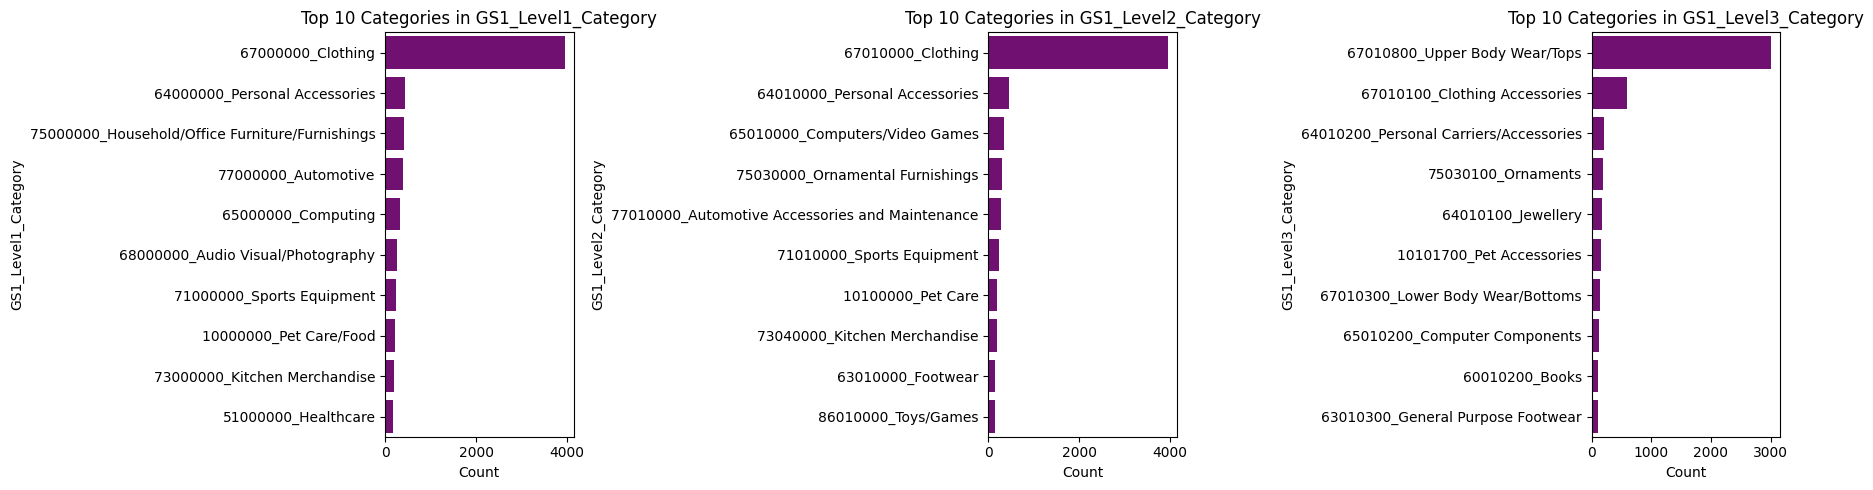

In [ ]:
plt.figure(figsize=(18, 5))
for i, level in enumerate(target_levels, 1):
    plt.subplot(1, 3, i)
    top_categories = df[level].value_counts().nlargest(10)
    sns.barplot(y=top_categories.index, x=top_categories.values, orient='h', color='purple')
    plt.title(f'Top 10 Categories in {level}')
    plt.xlabel("Count")
    plt.ylabel(level)
plt.tight_layout()
plt.show()

2. Word Frequency Analysis with Word Clouds

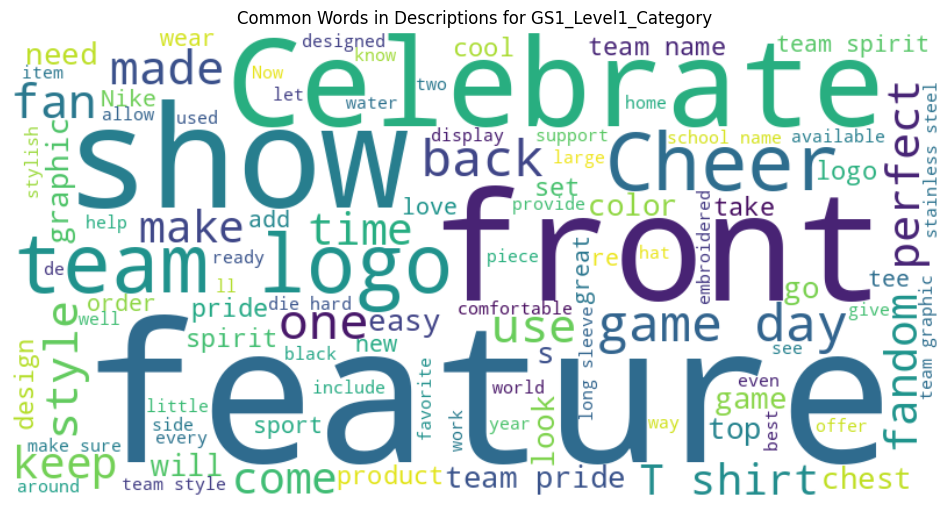

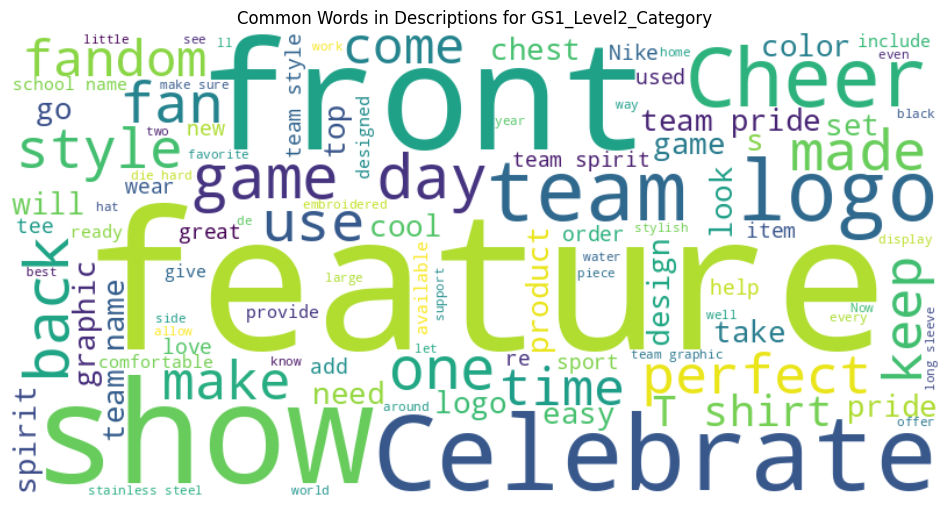

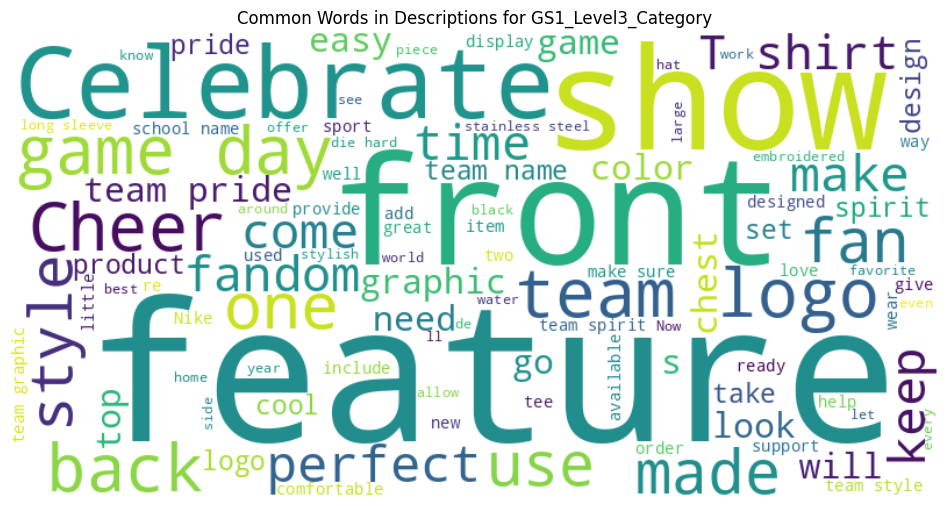

In [ ]:
for level in target_levels:
    subset = df[df[level].notnull()]
    text = ' '.join(subset['s:description'].fillna('').astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Common Words in Descriptions for {level}")
    plt.show()

3)Category Relationship Heatmap

In [ ]:
top_level1_level2 = pd.crosstab(df['GS1_Level1_Category'], df['GS1_Level2_Category'])
top_level1_level2 = top_level1_level2.loc[:, top_level1_level2.sum().nlargest(20).index]

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


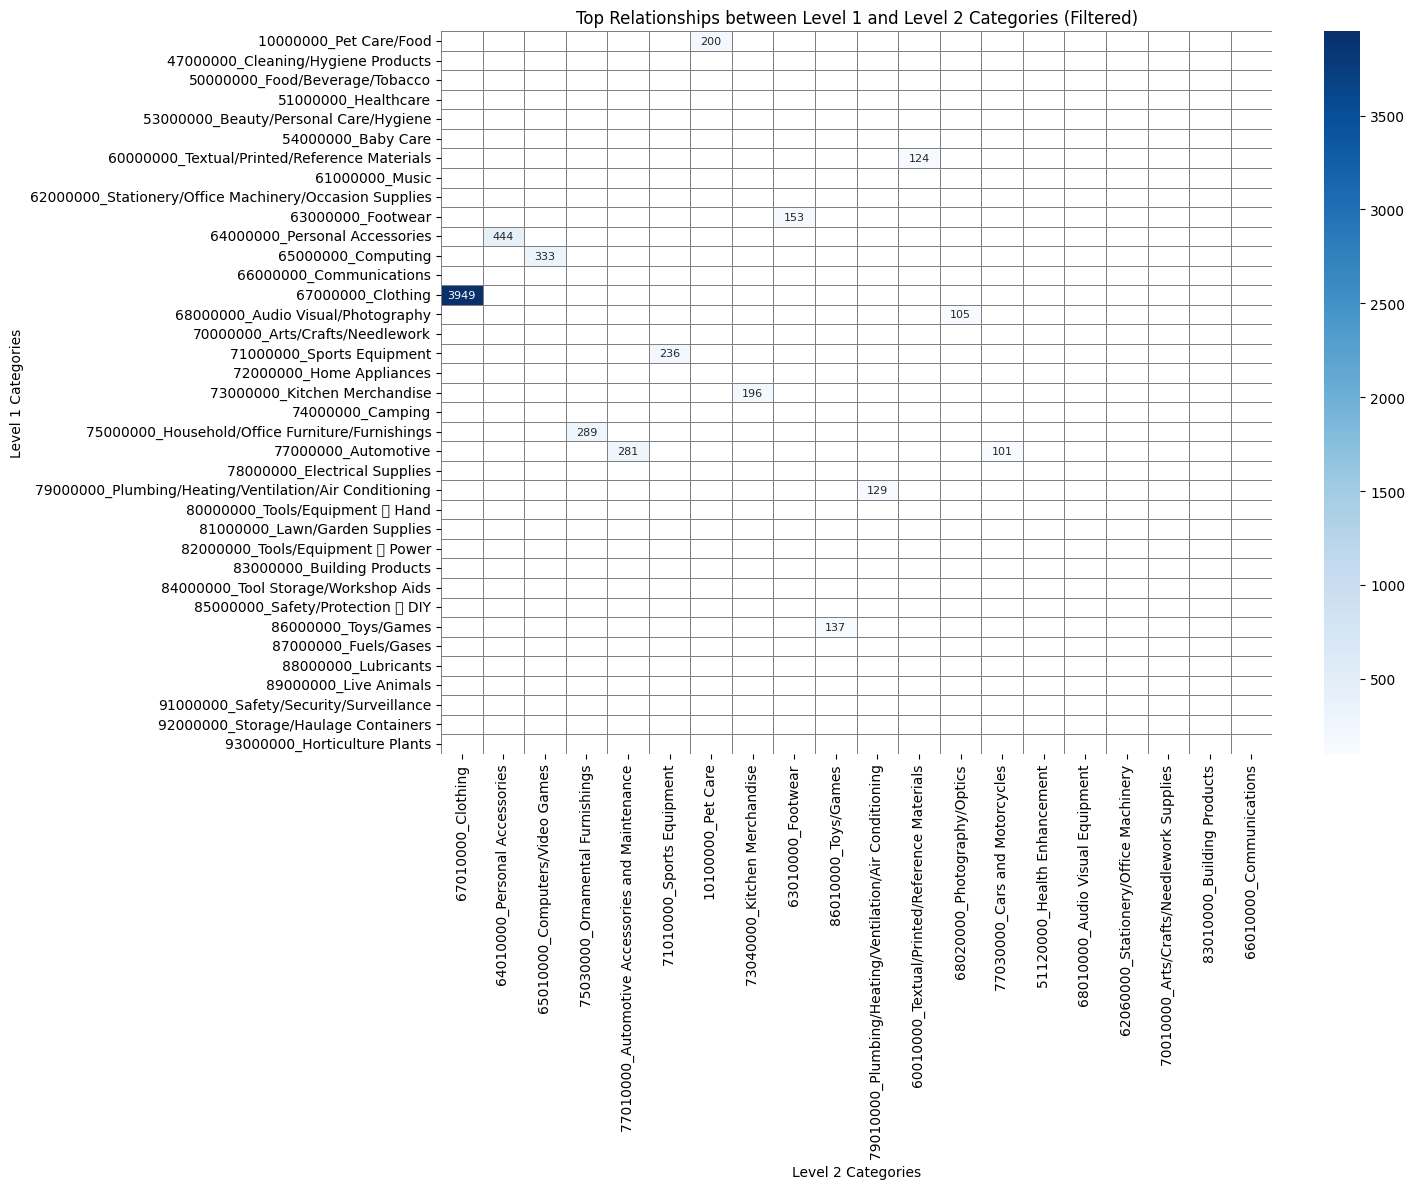

In [ ]:
threshold = 100
plt.figure(figsize=(15, 12))
sns.heatmap(top_level1_level2, cmap="Blues", annot=True, fmt="d",
            annot_kws={"size": 8}, cbar=True, mask=top_level1_level2 < threshold,
            linewidths=.5, linecolor='gray')
plt.title("Top Relationships between Level 1 and Level 2 Categories (Filtered)")
plt.xlabel("Level 2 Categories")
plt.ylabel("Level 1 Categories")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

4. Product Description Length Analysis

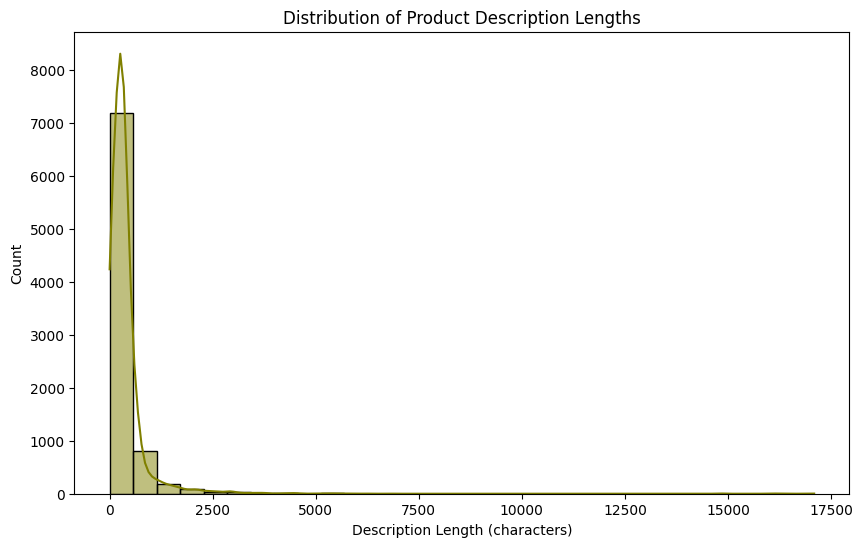

In [ ]:
df['description_length'] = df['s:description'].fillna('').apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], bins=30, kde=True, color='#808000')
plt.title("Distribution of Product Description Lengths")
plt.xlabel("Description Length (characters)")
plt.show()

5)Brand Popularity Across Categories

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


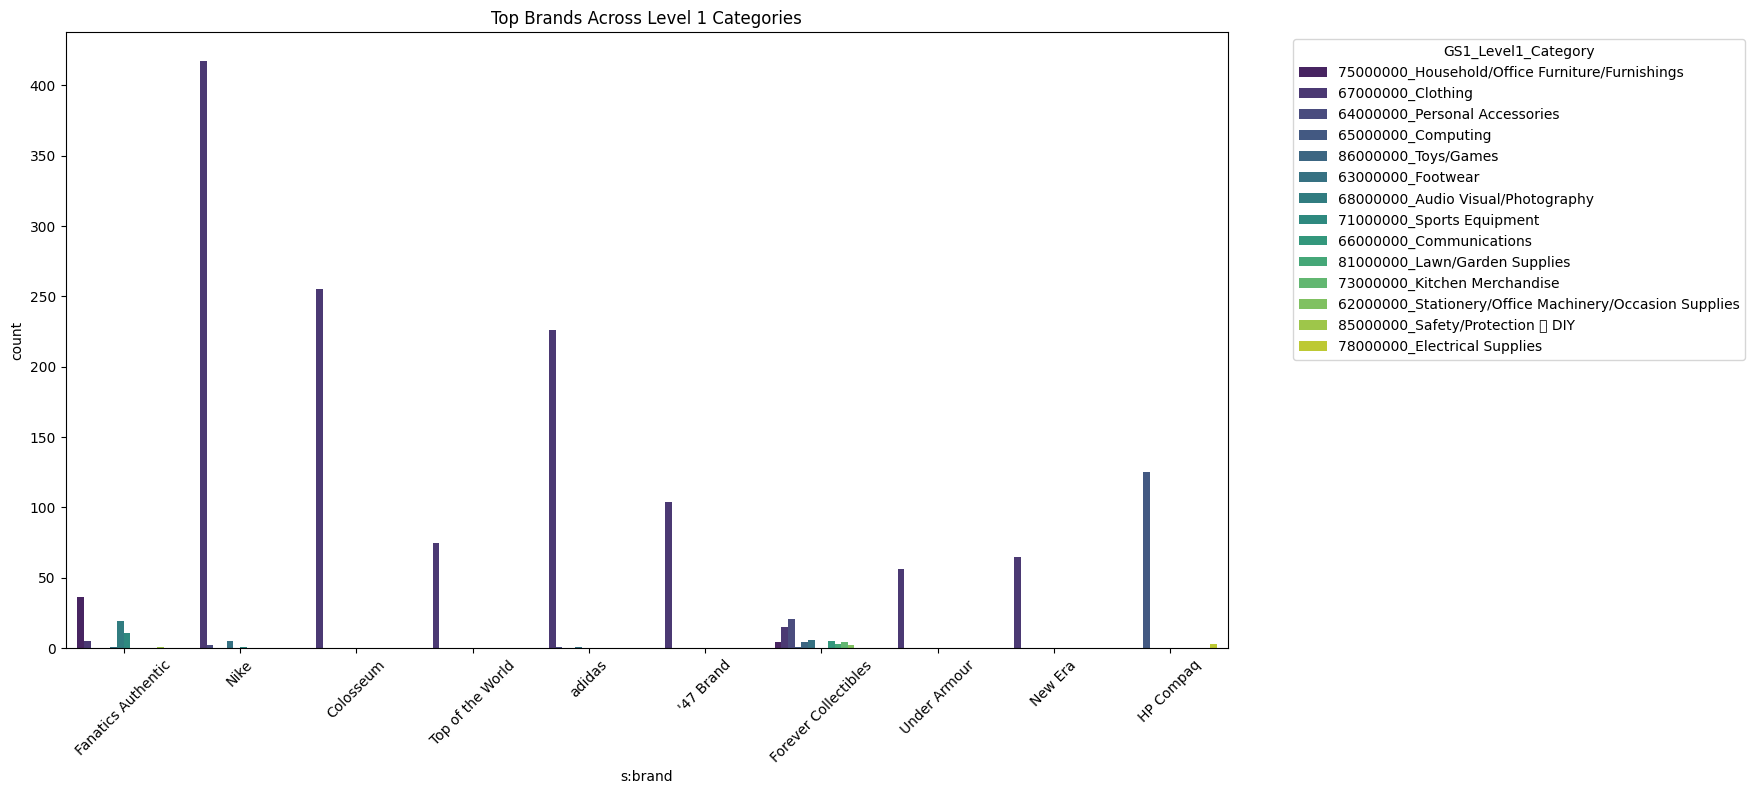

In [ ]:
top_brands = df['s:brand'].value_counts().nlargest(10).index
brand_data = df[df['s:brand'].isin(top_brands)]

plt.figure(figsize=(15, 8))
sns.countplot(data=brand_data, x='s:brand', hue='GS1_Level1_Category', palette='viridis')
plt.xticks(rotation=45)
plt.legend(title="GS1_Level1_Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Top Brands Across Level 1 Categories")
plt.show()

6)Grouped Bar Chart

In [ ]:
category_focus = "67000000_Clothing"
filtered_data = df[df['GS1_Level1_Category'] == category_focus]

In [ ]:
grouped_counts = filtered_data.groupby(['GS1_Level2_Category', 'GS1_Level3_Category']).size().reset_index(name='count')

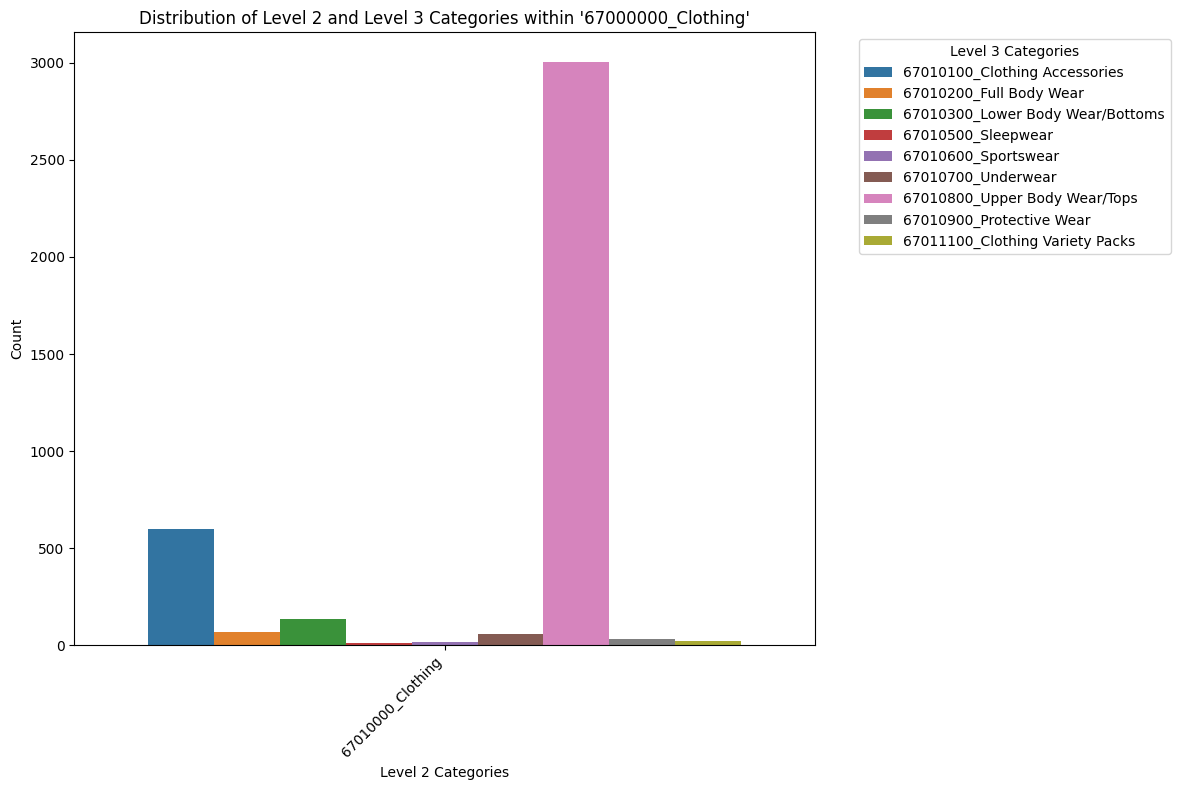

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_counts, x='GS1_Level2_Category', y='count', hue='GS1_Level3_Category')
plt.xticks(rotation=45, ha='right')
plt.title(f"Distribution of Level 2 and Level 3 Categories within '{category_focus}'")
plt.xlabel("Level 2 Categories")
plt.ylabel("Count")
plt.legend(title="Level 3 Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

7)Stacked Bar Chart for Level 1 Category Composition

In [ ]:
stacked_data = df.groupby(['GS1_Level1_Category', 'GS1_Level2_Category']).size().unstack(fill_value=0)

<ipython-input-18-1a17beb5e303>:6: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
<ipython-input-18-1a17beb5e303>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


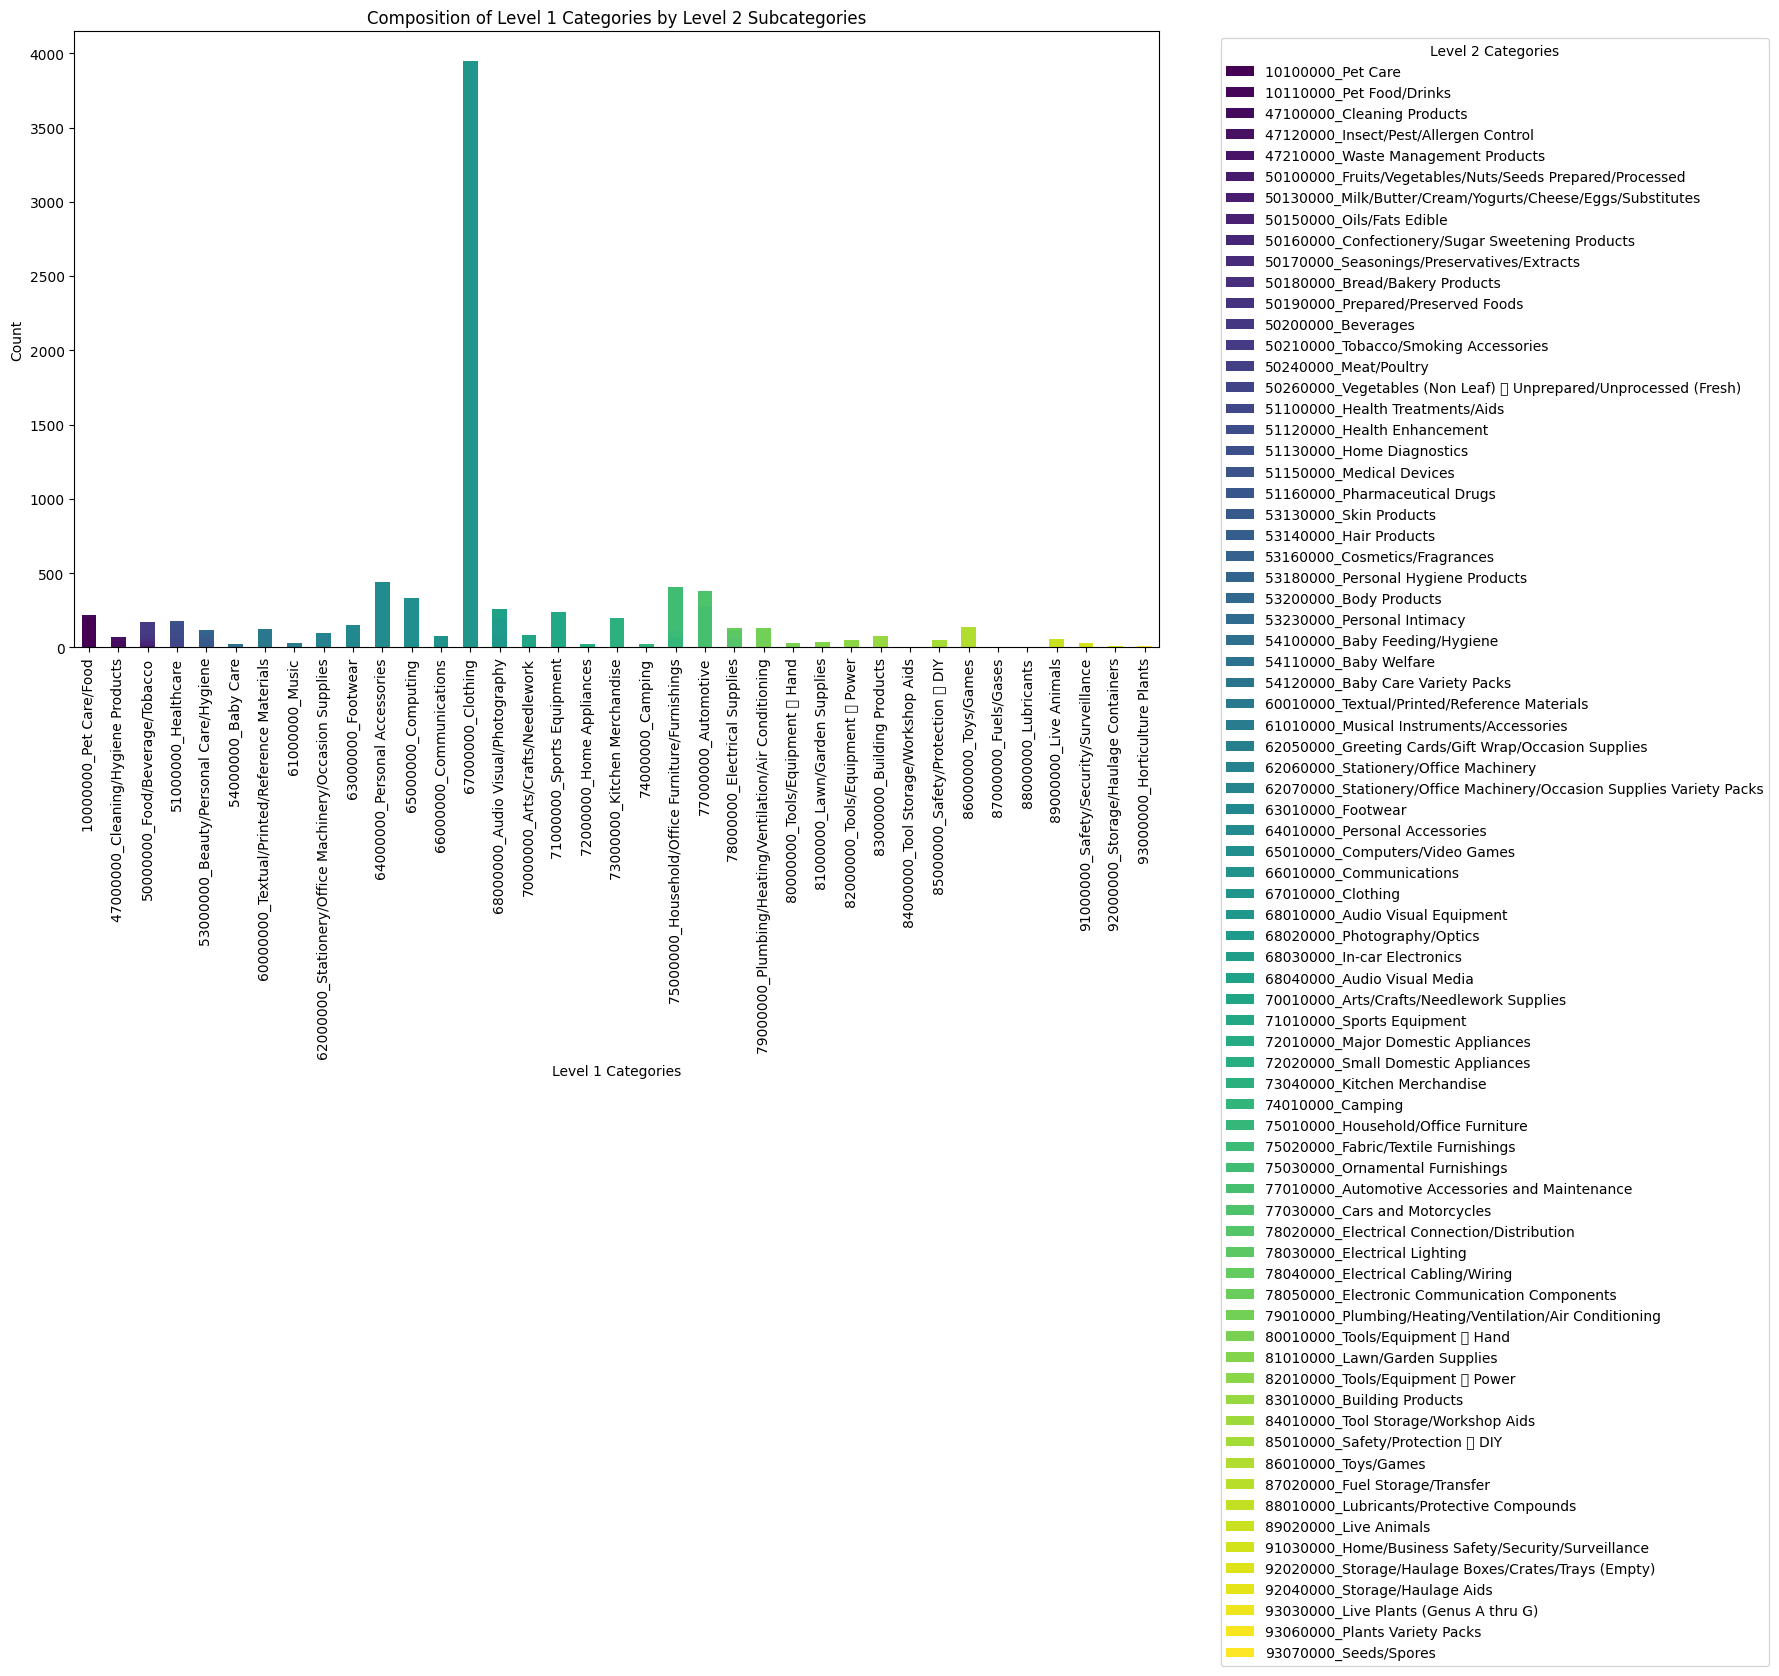

In [ ]:
stacked_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="viridis")
plt.title("Composition of Level 1 Categories by Level 2 Subcategories")
plt.xlabel("Level 1 Categories")
plt.ylabel("Count")
plt.legend(title="Level 2 Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

8)Hierarchical Treemap for Category Composition

In [ ]:
treemap_data = df.groupby(['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category']).size().reset_index(name='count')


In [ ]:
fig = px.treemap(
    treemap_data,
    path=['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category'],
    values='count',
    color='count',
    color_continuous_scale='Viridis',
    title='Category Distribution Across Levels'
)
fig.show()

9)Alluvial Diagram

In [ ]:
alluvial_data = df.groupby(['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category']).size().reset_index(name='count')

top_level1 = alluvial_data.groupby('GS1_Level1_Category')['count'].sum().nlargest(5).index
top_level2 = alluvial_data.groupby('GS1_Level2_Category')['count'].sum().nlargest(5).index
top_level3 = alluvial_data.groupby('GS1_Level3_Category')['count'].sum().nlargest(5).index

In [ ]:
alluvial_data['GS1_Level1_Category'] = alluvial_data['GS1_Level1_Category'].apply(lambda x: x if x in top_level1 else 'Other')
alluvial_data['GS1_Level2_Category'] = alluvial_data['GS1_Level2_Category'].apply(lambda x: x if x in top_level2 else 'Other')
alluvial_data['GS1_Level3_Category'] = alluvial_data['GS1_Level3_Category'].apply(lambda x: x if x in top_level3 else 'Other')

In [ ]:
alluvial_data = alluvial_data.groupby(['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category']).sum().reset_index()

In [ ]:
fig = px.parallel_categories(alluvial_data, dimensions=['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category'],
                             color=alluvial_data['count'], color_continuous_scale=px.colors.sequential.Inferno,
                             title="Simplified Alluvial Diagram for Top Categories")
fig.update_layout(width=900, height=600)
fig.show()

10)Sunburst

In [ ]:
sunburst_data = df.groupby(['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category']).size().reset_index(name='count')

In [ ]:
fig = px.sunburst(
    sunburst_data,
    path=['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category'],
    values='count',
    color='count',
    color_continuous_scale='Blues',
    title="Hierarchical Breakdown of Categories"
)
fig.show()

Text-Vectorization:

In [ ]:
df['s:name'] = df['s:name'].fillna('')
df['s:description'] = df['s:description'].fillna('')
df['s:breadcrumb'] = df['s:breadcrumb'].fillna('')
df['s:brand'] = df['s:brand'].fillna('Unknown')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(max_features=1000), 's:name'),
        ('description_tfidf', TfidfVectorizer(max_features=5000), 's:description'),
        ('breadcrumb_tfidf', TfidfVectorizer(max_features=500), 's:breadcrumb'),
        ('brand_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['s:brand']),
        ('scaler', StandardScaler(), ['description_length'])
    ],
    remainder='drop'
)

In [ ]:
y_level1 = df['GS1_Level1_Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y_level1, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=2)

In [ ]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=3.



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('name_tfidf',
                                                                         TfidfVectorizer(max_features=1000),
                                                                         's:name'),
                                                                        ('description_tfidf',
                                                                         TfidfVectorizer(max_features=5000),
                                                                         's:description'),
                                                                        ('breadcrumb_tfidf',
                                                                         TfidfVectorizer(max_features=500),
                                                                         's:breadcrumb'),
                                                                        ('brand_ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['s:brand']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['description_length'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best cross-validation accuracy: 0.760615973299374


In [ ]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.7842199641362821


In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

                                                        precision    recall  f1-score   support

                                10000000_Pet Care/Food       0.71      0.69      0.70        42
                    47000000_Cleaning/Hygiene Products       1.00      0.58      0.74        12
                        50000000_Food/Beverage/Tobacco       0.75      0.73      0.74        33
                                   51000000_Healthcare       1.00      0.56      0.71        45
                 53000000_Beauty/Personal Care/Hygiene       0.75      0.68      0.71        22
                                    54000000_Baby Care       1.00      0.33      0.50         6
          60000000_Textual/Printed/Reference Materials       0.85      0.71      0.77        24
                                        61000000_Music       1.00      0.38      0.55         8
62000000_Stationery/Office Machinery/Occasion Supplies       1.00      0.16      0.27        19
                                     63

Level1:

In [ ]:
y_level1 = df['GS1_Level1_Category']
X_train, X_test, y_train_level1, y_test_level1 = train_test_split(df, y_level1, test_size=0.2, random_state=42)

In [ ]:
pipeline_level1 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
grid_search_level1 = GridSearchCV(
    pipeline_level1,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=2)

In [ ]:
grid_search_level1.fit(X_train, y_train_level1)
best_model_level1 = grid_search_level1.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=3.



In [ ]:
y_pred_level1 = best_model_level1.predict(X_test)
print("Level 1 Classification Report:")
print(classification_report(y_test_level1, y_pred_level1, zero_division=0))

Level 1 Classification Report:
                                                        precision    recall  f1-score   support

                                10000000_Pet Care/Food       0.71      0.69      0.70        42
                    47000000_Cleaning/Hygiene Products       1.00      0.58      0.74        12
                        50000000_Food/Beverage/Tobacco       0.75      0.73      0.74        33
                                   51000000_Healthcare       1.00      0.56      0.71        45
                 53000000_Beauty/Personal Care/Hygiene       0.75      0.68      0.71        22
                                    54000000_Baby Care       1.00      0.33      0.50         6
          60000000_Textual/Printed/Reference Materials       0.85      0.71      0.77        24
                                        61000000_Music       1.00      0.38      0.55         8
62000000_Stationery/Office Machinery/Occasion Supplies       1.00      0.16      0.27        19
        

Level2:

In [ ]:
y_level2 = df['GS1_Level2_Category']
df['pred_level1'] = grid_search_level1.best_estimator_.predict(df)

In [ ]:
X_train, X_test, y_train_level2, y_test_level2 = train_test_split(df, y_level2, test_size=0.2, random_state=42)

In [ ]:
pipeline_level2 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
grid_search_level2 = GridSearchCV(
    pipeline_level2,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=2)

In [ ]:
grid_search_level2.fit(X_train, y_train_level2)
best_model_level2 = grid_search_level2.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [ ]:
y_pred_level2 = best_model_level2.predict(X_test)
print("Level 2 Classification Report:")
print(classification_report(y_test_level2, y_pred_level2,zero_division=0))

Level 2 Classification Report:
                                                                 precision    recall  f1-score   support

                                              10100000_Pet Care       0.62      0.66      0.64        35
                                       10110000_Pet Food/Drinks       0.80      0.57      0.67         7
                                     47100000_Cleaning Products       1.00      0.44      0.62         9
                          47120000_Insect/Pest/Allergen Control       1.00      1.00      1.00         3
       50100000_Fruits/Vegetables/Nuts/Seeds Prepared/Processed       0.50      0.67      0.57         3
     50130000_Milk/Butter/Cream/Yogurts/Cheese/Eggs/Substitutes       0.00      0.00      0.00         1
               50160000_Confectionery/Sugar Sweetening Products       0.67      0.67      0.67         3
                     50170000_Seasonings/Preservatives/Extracts       0.33      1.00      0.50         1
                       

Level 3:

In [ ]:
y_level3 = df['GS1_Level3_Category']
df['pred_level2'] = grid_search_level2.best_estimator_.predict(df)

In [ ]:
X_train, X_test, y_train_level3, y_test_level3 = train_test_split(df, y_level3, test_size=0.2, random_state=42)

In [ ]:
pipeline_level3 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
grid_search_level3 = GridSearchCV(
    pipeline_level3,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=2)

In [ ]:
grid_search_level3.fit(X_train, y_train_level3)
best_model_level3 = grid_search_level3.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



In [ ]:
y_pred_level3 = best_model_level3.predict(X_test)
print("Level 3 Classification Report:")
print(classification_report(y_test_level3, y_pred_level3,zero_division=0))

Level 3 Classification Report:
                                                                      precision    recall  f1-score   support

                                        10101500_Pet Welfare/Hygiene       1.00      0.50      0.67         8
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.44      0.73      0.55        26
                                                   10111600_Pet Food       0.80      0.57      0.67         7
                                                   47101600_Cleaners       0.71      0.56      0.62         9
                               47121500_Insect/Pest/Allergen Control       1.00      1.00      1.00         3
                                 50102000_Fruit  Prepared/Processed       0.00      0.00      0.00         1
                            50102100_Vegetables  Prepared/Processed       0.50      1.0

Plots for Classification report:

In [ ]:
levels = ['Level 1', 'Level 2', 'Level 3']
accuracy = [0.78, 0.77, 0.73]
macro_avg_precision = [0.78, 0.62, 0.41]
macro_avg_recall = [0.53, 0.45, 0.35]
macro_avg_f1 = [0.60, 0.50, 0.36]
weighted_avg_precision = [0.80, 0.78, 0.71]
weighted_avg_recall = [0.78, 0.77, 0.73]
weighted_avg_f1 = [0.77, 0.75, 0.70]


In [ ]:
plt.figure(figsize=(14, 8))



<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<ipython-input-141-e9f9ba4a2705>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




(0.0, 1.0)

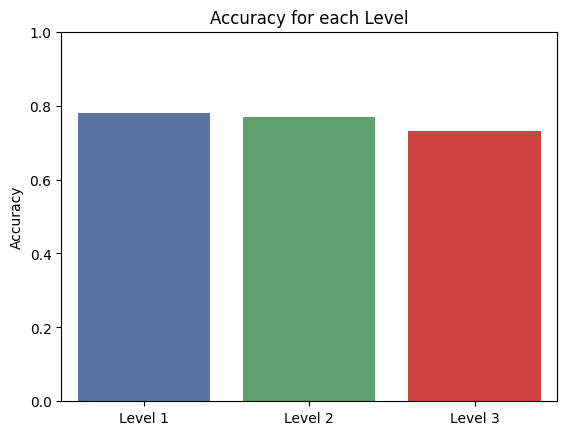

In [ ]:
sns.barplot(x=levels, y=accuracy, palette=["#4c72b0", "#55a868", "#e92a2a"])
plt.title("Accuracy for each Level")
plt.ylabel("Accuracy")
plt.ylim(0, 1)


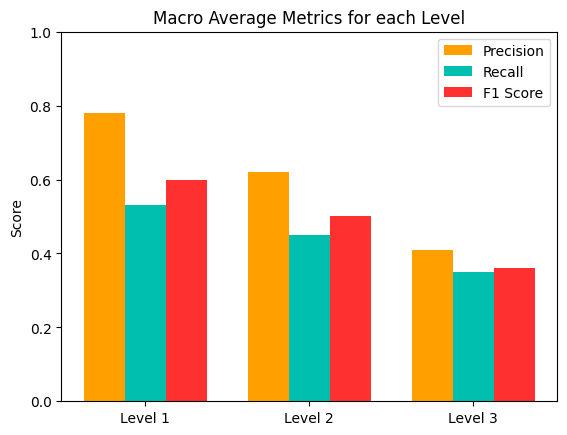

In [ ]:
bar_width = 0.25
x = range(len(levels))
plt.bar([i - bar_width for i in x], macro_avg_precision, width=bar_width, label='Precision', color='#ff9f00')
plt.bar(x, macro_avg_recall, width=bar_width, label='Recall', color='#00bfae')
plt.bar([i + bar_width for i in x], macro_avg_f1, width=bar_width, label='F1 Score', color='#ff3030')

plt.title("Macro Average Metrics for each Level")
plt.ylabel("Score")
plt.xticks(x, levels)
plt.ylim(0, 1)
plt.legend()

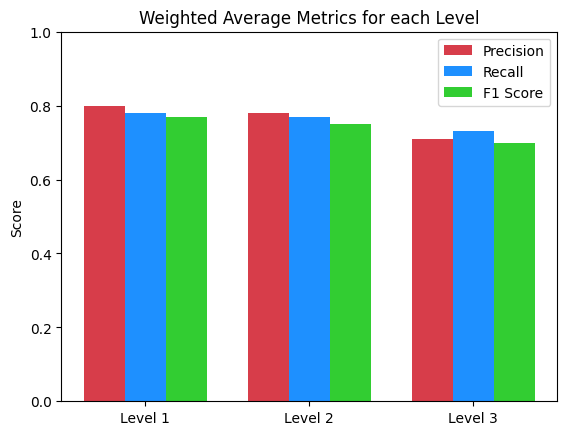

In [ ]:
plt.bar([i - bar_width for i in x], weighted_avg_precision, width=bar_width, label='Precision', color='#d73d4a')
plt.bar(x, weighted_avg_recall, width=bar_width, label='Recall', color='#1e90ff')
plt.bar([i + bar_width for i in x], weighted_avg_f1, width=bar_width, label='F1 Score', color='#32cd32')

plt.title("Weighted Average Metrics for each Level")
plt.ylabel("Score")
plt.xticks(x, levels)
plt.ylim(0, 1)
plt.legend()

 Extra Trees Classifier:

In [ ]:
X = df.drop(columns=['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category'])
y = df[['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Your preprocessing step
    ('classifier', MultiOutputClassifier(ExtraTreesClassifier(random_state=42)))
])

In [ ]:
param_grid = {
    'classifier__estimator__n_estimators': [50, 100, 200],
    'classifier__estimator__max_depth': [None, 10, 20],
    'classifier__estimator__min_samples_split': [2, 5],
    'classifier__estimator__min_samples_leaf': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('name_tfidf',
                                                                         TfidfVectorizer(max_features=1000),
                                                                         's:name'),
                                                                        ('description_tfidf',
                                                                         TfidfVectorizer(max_features=5000),
                                                                         's:description'),
                                                                        ('breadcrumb_tfidf',
                                                                         TfidfVectorizer(max_features=500),
                                                                         's:breadcrumb'),
                                                                        ('brand_ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       spars...
                                                                         ['description_length'])])),
                                       ('classifier',
                                        MultiOutputClassifier(estimator=ExtraTreesClassifier(random_state=42)))]),
             n_jobs=-1,
             param_grid={'classifier__estimator__max_depth': [None, 10, 20],
                         'classifier__estimator__min_samples_leaf': [1, 2],
                         'classifier__estimator__min_samples_split': [2, 5],
                         'classifier__estimator__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
# Get predictions for all target variables
y_pred = grid_search.predict(X_test)

print("--- Classification Report for Level 1 ---")
print(classification_report(y_test['GS1_Level1_Category'], y_pred[:, 0], zero_division=0))

--- Classification Report for Level 1 ---
                                                        precision    recall  f1-score   support

                                10000000_Pet Care/Food       0.80      0.79      0.80        42
                    47000000_Cleaning/Hygiene Products       1.00      0.67      0.80        12
                        50000000_Food/Beverage/Tobacco       0.78      0.76      0.77        33
                                   51000000_Healthcare       0.97      0.64      0.77        45
                 53000000_Beauty/Personal Care/Hygiene       0.75      0.68      0.71        22
                                    54000000_Baby Care       1.00      0.33      0.50         6
          60000000_Textual/Printed/Reference Materials       0.69      0.75      0.72        24
                                        61000000_Music       0.75      0.38      0.50         8
62000000_Stationery/Office Machinery/Occasion Supplies       0.67      0.21      0.32        

In [ ]:
y_pred = grid_search.predict(X_test)

print("--- Classification Report for Level 2 ---")
print(classification_report(y_test['GS1_Level2_Category'], y_pred[:, 1],zero_division=0))

--- Classification Report for Level 2 ---
                                                                 precision    recall  f1-score   support

                                              10100000_Pet Care       0.81      0.71      0.76        35
                                       10110000_Pet Food/Drinks       0.67      0.57      0.62         7
                                     47100000_Cleaning Products       1.00      0.44      0.62         9
                          47120000_Insect/Pest/Allergen Control       1.00      1.00      1.00         3
       50100000_Fruits/Vegetables/Nuts/Seeds Prepared/Processed       0.40      0.67      0.50         3
     50130000_Milk/Butter/Cream/Yogurts/Cheese/Eggs/Substitutes       0.00      0.00      0.00         1
               50160000_Confectionery/Sugar Sweetening Products       0.67      0.67      0.67         3
                     50170000_Seasonings/Preservatives/Extracts       0.50      1.00      0.67         1
            

In [ ]:
y_pred = grid_search.predict(X_test)
print("--- Classification Report for Level 3 ---")
print(classification_report(y_test['GS1_Level3_Category'], y_pred[:, 2], zero_division=0))

--- Classification Report for Level 3 ---
                                                                      precision    recall  f1-score   support

                                        10101500_Pet Welfare/Hygiene       0.80      0.50      0.62         8
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.45      0.77      0.57        26
                                                   10111600_Pet Food       0.57      0.57      0.57         7
                                                   47101600_Cleaners       0.83      0.56      0.67         9
                                                    47101700_Laundry       0.00      0.00      0.00         0
                               47121500_Insect/Pest/Allergen Control       1.00      1.00      1.00         3
                                 50102000_Fruit  Prepared/Processed       0.

Plots for Classification report:

In [ ]:
levels = ['Level 1', 'Level 2', 'Level 3']
accuracy = [0.80, 0.78, 0.74]
macro_precision = [0.74, 0.61, 0.42]
macro_recall = [0.54, 0.46, 0.37]
macro_f1 = [0.60, 0.50, 0.38]
weighted_precision = [0.80, 0.78, 0.70]
weighted_recall = [0.80, 0.78, 0.74]
weighted_f1 = [0.78, 0.77, 0.70]

<ipython-input-145-9df7018855d2>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




(0.0, 1.0)

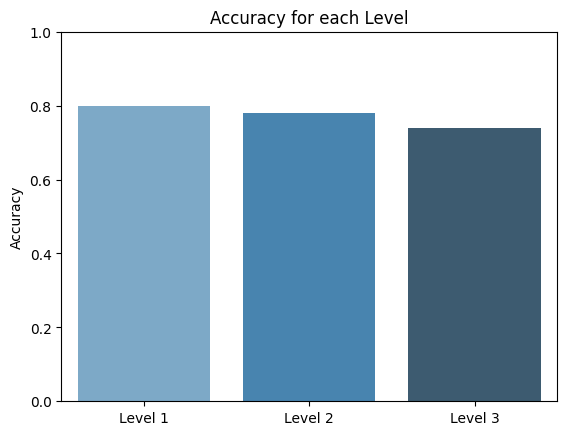

In [ ]:
sns.barplot(x=levels, y=accuracy, palette="Blues_d")
plt.title("Accuracy for each Level")
plt.ylabel("Accuracy")
plt.ylim(0, 1)


(0.0, 1.0)

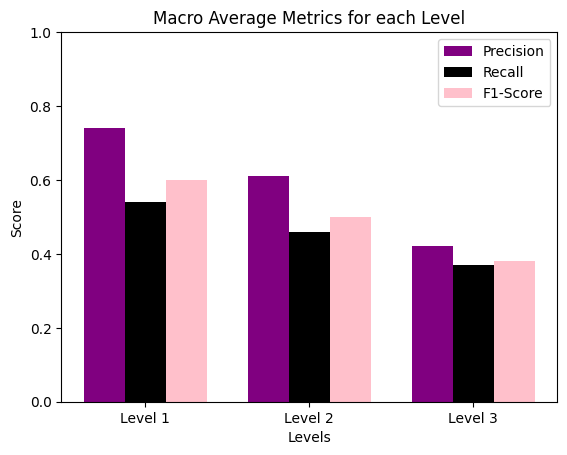

In [ ]:
bar_width = 0.25
x = range(len(levels))

precision_color = 'purple'
recall_color = 'black'
f1_color = 'pink'
plt.bar(x, macro_precision, width=bar_width, label='Precision', color=precision_color)
plt.bar([i + bar_width for i in x], macro_recall, width=bar_width, label='Recall', color=recall_color)
plt.bar([i + 2*bar_width for i in x], macro_f1, width=bar_width, label='F1-Score', color=f1_color)

plt.title("Macro Average Metrics for each Level")
plt.xlabel("Levels")
plt.ylabel("Score")
plt.xticks([i + bar_width for i in x], levels)  # Move x-ticks to the center
plt.legend(loc='best')
plt.ylim(0, 1)

(0.0, 1.0)

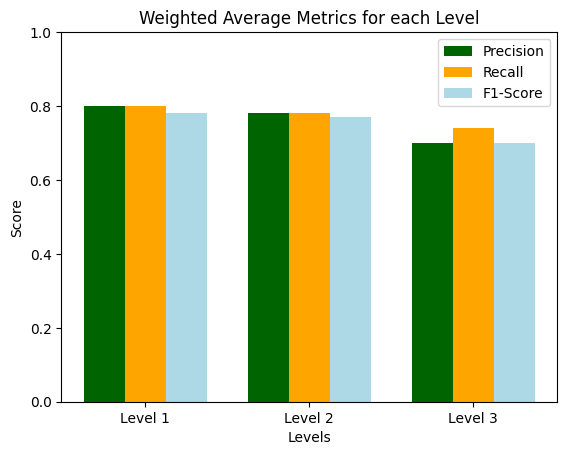

In [ ]:
precision_color_w = 'darkgreen'
recall_color_w = 'orange'
f1_color_w = 'lightblue'

plt.bar(x, weighted_precision, width=bar_width, label='Precision', color=precision_color_w)
plt.bar([i + bar_width for i in x], weighted_recall, width=bar_width, label='Recall', color=recall_color_w)
plt.bar([i + 2*bar_width for i in x], weighted_f1, width=bar_width, label='F1-Score', color=f1_color_w)

plt.title("Weighted Average Metrics for each Level")
plt.xlabel("Levels")
plt.ylabel("Score")
plt.xticks([i + bar_width for i in x], levels)  # Move x-ticks to the center
plt.legend(loc='best')
plt.ylim(0, 1)

Logistic Regression:

In [ ]:
df= pd.read_csv('/content/goldstandard_eng_v1.csv',delimiter=';', quoting=csv.QUOTE_ALL, encoding='ISO-8859-1')

In [ ]:
print(df.columns)

Index(['GeneratedID', 'EntityNodeID', 'URL', 'HOST', 's:name', 's:description',
       's:brand', 'Properties', 's:category', 's:breadcrumb',
       'GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category'],
      dtype='object')


In [ ]:
df['s:name'] = df['s:name'].fillna('')
df['s:description'] = df['s:description'].fillna('')
df['s:breadcrumb'] = df['s:breadcrumb'].fillna('')
df['s:brand'] = df['s:brand'].fillna('Unknown')
df['description_length'] = df['s:description'].apply(lambda x: len(str(x)))

In [ ]:
X = df.drop(columns=['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category'])
y = df[['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(max_features=1000), 's:name'),
        ('description_tfidf', TfidfVectorizer(max_features=5000), 's:description'),
        ('breadcrumb_tfidf', TfidfVectorizer(max_features=500), 's:breadcrumb'),
        ('brand_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['s:brand']),
        ('scaler', StandardScaler(), ['description_length'])  # Ensure description_length is in X
    ],
    remainder='drop'
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42)))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('name_tfidf',
                                                  TfidfVectorizer(max_features=1000),
                                                  's:name'),
                                                 ('description_tfidf',
                                                  TfidfVectorizer(max_features=5000),
                                                  's:description'),
                                                 ('breadcrumb_tfidf',
                                                  TfidfVectorizer(max_features=500),
                                                  's:breadcrumb'),
                                                 ('brand_ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['s:brand']),
                                                 ('scaler', StandardScaler(),
                                                  ['description_length'])])),
                ('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000,
                                                                    random_state=42)))])

In [ ]:
y_pred_level1 = pipeline.predict(X_test)[:, 0]
y_pred_level2 = pipeline.predict(X_test)[:, 1]
y_pred_level3 = pipeline.predict(X_test)[:, 2]


In [ ]:
print("--- Classification Report for Level 1 ---")
print(classification_report(y_test['GS1_Level1_Category'], y_pred_level1, zero_division=0))

--- Classification Report for Level 1 ---
                                                        precision    recall  f1-score   support

                                10000000_Pet Care/Food       0.87      0.79      0.82        42
                    47000000_Cleaning/Hygiene Products       1.00      0.67      0.80        12
                        50000000_Food/Beverage/Tobacco       0.72      0.64      0.68        33
                                   51000000_Healthcare       0.90      0.62      0.74        45
                 53000000_Beauty/Personal Care/Hygiene       0.81      0.59      0.68        22
                                    54000000_Baby Care       0.00      0.00      0.00         6
          60000000_Textual/Printed/Reference Materials       0.70      0.67      0.68        24
                                        61000000_Music       0.83      0.62      0.71         8
62000000_Stationery/Office Machinery/Occasion Supplies       1.00      0.53      0.69        

In [ ]:
print("--- Classification Report for Level 2 ---")
print(classification_report(y_test['GS1_Level2_Category'], y_pred_level2, zero_division=0))


--- Classification Report for Level 2 ---
                                                                 precision    recall  f1-score   support

                                              10100000_Pet Care       0.73      0.77      0.75        35
                                       10110000_Pet Food/Drinks       0.00      0.00      0.00         7
                                     47100000_Cleaning Products       1.00      0.56      0.71         9
                          47120000_Insect/Pest/Allergen Control       1.00      1.00      1.00         3
       50100000_Fruits/Vegetables/Nuts/Seeds Prepared/Processed       0.67      0.67      0.67         3
     50130000_Milk/Butter/Cream/Yogurts/Cheese/Eggs/Substitutes       0.00      0.00      0.00         1
               50160000_Confectionery/Sugar Sweetening Products       1.00      0.33      0.50         3
                     50170000_Seasonings/Preservatives/Extracts       1.00      1.00      1.00         1
            

In [ ]:
print("--- Classification Report for Level 3 ---")
print(classification_report(y_test['GS1_Level3_Category'], y_pred_level3, zero_division=0))

--- Classification Report for Level 3 ---
                                                                      precision    recall  f1-score   support

                                        10101500_Pet Welfare/Hygiene       0.50      0.38      0.43         8
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.44      0.88      0.59        26
                                                   10111600_Pet Food       1.00      0.14      0.25         7
                                                   47101600_Cleaners       0.83      0.56      0.67         9
                               47121500_Insect/Pest/Allergen Control       1.00      1.00      1.00         3
                                 50102000_Fruit  Prepared/Processed       0.00      0.00      0.00         1
                            50102100_Vegetables  Prepared/Processed       0.

In [ ]:
levels = ['Level 1', 'Level 2', 'Level 3']
accuracy = [0.82, 0.80, 0.73]
macro_f1 = [0.63, 0.47, 0.34]
weighted_f1 = [0.81, 0.77, 0.68]

colors = ['#FF6347', '#4682B4', '#32CD32']

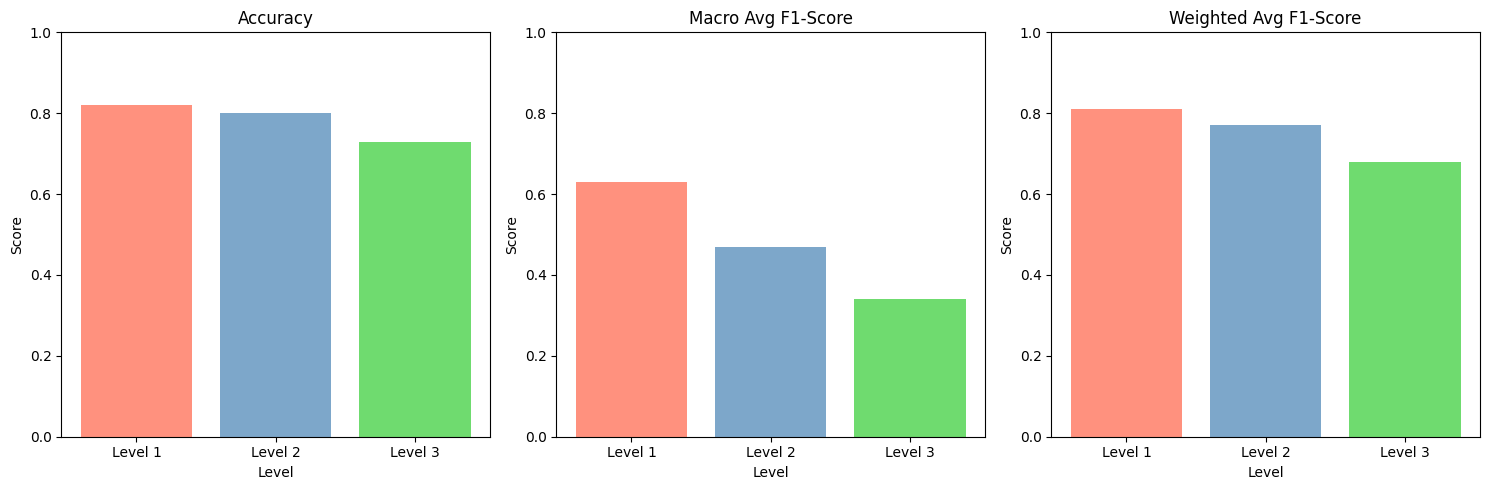

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(levels, accuracy, color=colors, alpha=0.7)
axes[0].set_title('Accuracy')
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Level')

axes[1].bar(levels, macro_f1, color=colors, alpha=0.7)
axes[1].set_title('Macro Avg F1-Score')
axes[1].set_ylim(0, 1)
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Level')

axes[2].bar(levels, weighted_f1, color=colors, alpha=0.7)
axes[2].set_title('Weighted Avg F1-Score')
axes[2].set_ylim(0, 1)
axes[2].set_ylabel('Score')
axes[2].set_xlabel('Level')
plt.tight_layout()
plt.show()

Naive Bayes:

In [ ]:
X = df.drop(columns=['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category'])
y = df[['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df['s:name'] = df['s:name'].fillna('')
df['s:description'] = df['s:description'].fillna('')
df['s:breadcrumb'] = df['s:breadcrumb'].fillna('')
df['s:brand'] = df['s:brand'].fillna('Unknown')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(max_features=1000), 's:name'),
        ('description_tfidf', TfidfVectorizer(max_features=5000), 's:description'),
        ('breadcrumb_tfidf', TfidfVectorizer(max_features=500), 's:breadcrumb'),
        ('brand_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['s:brand']),
    ],
    remainder='drop'
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(MultinomialNB()))
])

In [ ]:
param_grid = {
    'classifier__estimator__alpha': [0.1, 0.5, 1.0],
    'classifier__estimator__fit_prior': [True, False]
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan]



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('name_tfidf',
                                                                         TfidfVectorizer(max_features=1000),
                                                                         's:name'),
                                                                        ('description_tfidf',
                                                                         TfidfVectorizer(max_features=5000),
                                                                         's:description'),
                                                                        ('breadcrumb_tfidf',
                                                                         TfidfVectorizer(max_features=500),
                                                                         's:breadcrumb'),
                                                                        ('brand_ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['s:brand'])])),
                                       ('classifier',
                                        MultiOutputClassifier(estimator=MultinomialNB()))]),
             n_jobs=-1,
             param_grid={'classifier__estimator__alpha': [0.1, 0.5, 1.0],
                         'classifier__estimator__fit_prior': [True, False]},
             scoring='accuracy', verbose=2)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print("--- Classification Report for Level 1 ---")
print(classification_report(y_test['GS1_Level1_Category'], y_pred[:, 0], zero_division=0))


--- Classification Report for Level 1 ---
                                                        precision    recall  f1-score   support

                                10000000_Pet Care/Food       0.77      0.88      0.82        42
                    47000000_Cleaning/Hygiene Products       0.80      0.67      0.73        12
                        50000000_Food/Beverage/Tobacco       0.70      0.70      0.70        33
                                   51000000_Healthcare       0.87      0.60      0.71        45
                 53000000_Beauty/Personal Care/Hygiene       0.67      0.73      0.70        22
                                    54000000_Baby Care       0.67      0.33      0.44         6
          60000000_Textual/Printed/Reference Materials       0.71      0.83      0.77        24
                                        61000000_Music       0.83      0.62      0.71         8
62000000_Stationery/Office Machinery/Occasion Supplies       0.89      0.42      0.57        

In [ ]:
print("--- Classification Report for Level 2 ---")
print(classification_report(y_test['GS1_Level2_Category'], y_pred[:, 1],zero_division=0))

--- Classification Report for Level 2 ---
                                                                 precision    recall  f1-score   support

                                              10100000_Pet Care       0.65      0.91      0.76        35
                                       10110000_Pet Food/Drinks       0.00      0.00      0.00         7
                                     47100000_Cleaning Products       0.75      0.67      0.71         9
                          47120000_Insect/Pest/Allergen Control       1.00      1.00      1.00         3
       50100000_Fruits/Vegetables/Nuts/Seeds Prepared/Processed       0.33      0.33      0.33         3
     50130000_Milk/Butter/Cream/Yogurts/Cheese/Eggs/Substitutes       0.00      0.00      0.00         1
               50160000_Confectionery/Sugar Sweetening Products       1.00      0.33      0.50         3
                     50170000_Seasonings/Preservatives/Extracts       1.00      1.00      1.00         1
            

In [ ]:
print("--- Classification Report for Level 3 ---")
print(classification_report(y_test['GS1_Level3_Category'], y_pred[:, 2],zero_division=0))

--- Classification Report for Level 3 ---
                                                                      precision    recall  f1-score   support

                                        10101500_Pet Welfare/Hygiene       0.83      0.62      0.71         8
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.40      0.96      0.57        26
                                                   10111600_Pet Food       0.00      0.00      0.00         7
                                                   47101600_Cleaners       0.86      0.67      0.75         9
                               47121500_Insect/Pest/Allergen Control       1.00      1.00      1.00         3
                                 50102000_Fruit  Prepared/Processed       0.00      0.00      0.00         1
                            50102100_Vegetables  Prepared/Processed       0.

In [ ]:
levels = ['Level 1', 'Level 2', 'Level 3']
accuracy = [0.83, 0.81, 0.73]
macro_avg_precision = [0.72, 0.56, 0.41]
macro_avg_recall = [0.59, 0.47, 0.33]
macro_avg_f1 = [0.63, 0.49, 0.35]

colors = ['grey', 'cornsilk', 'darkcyan']

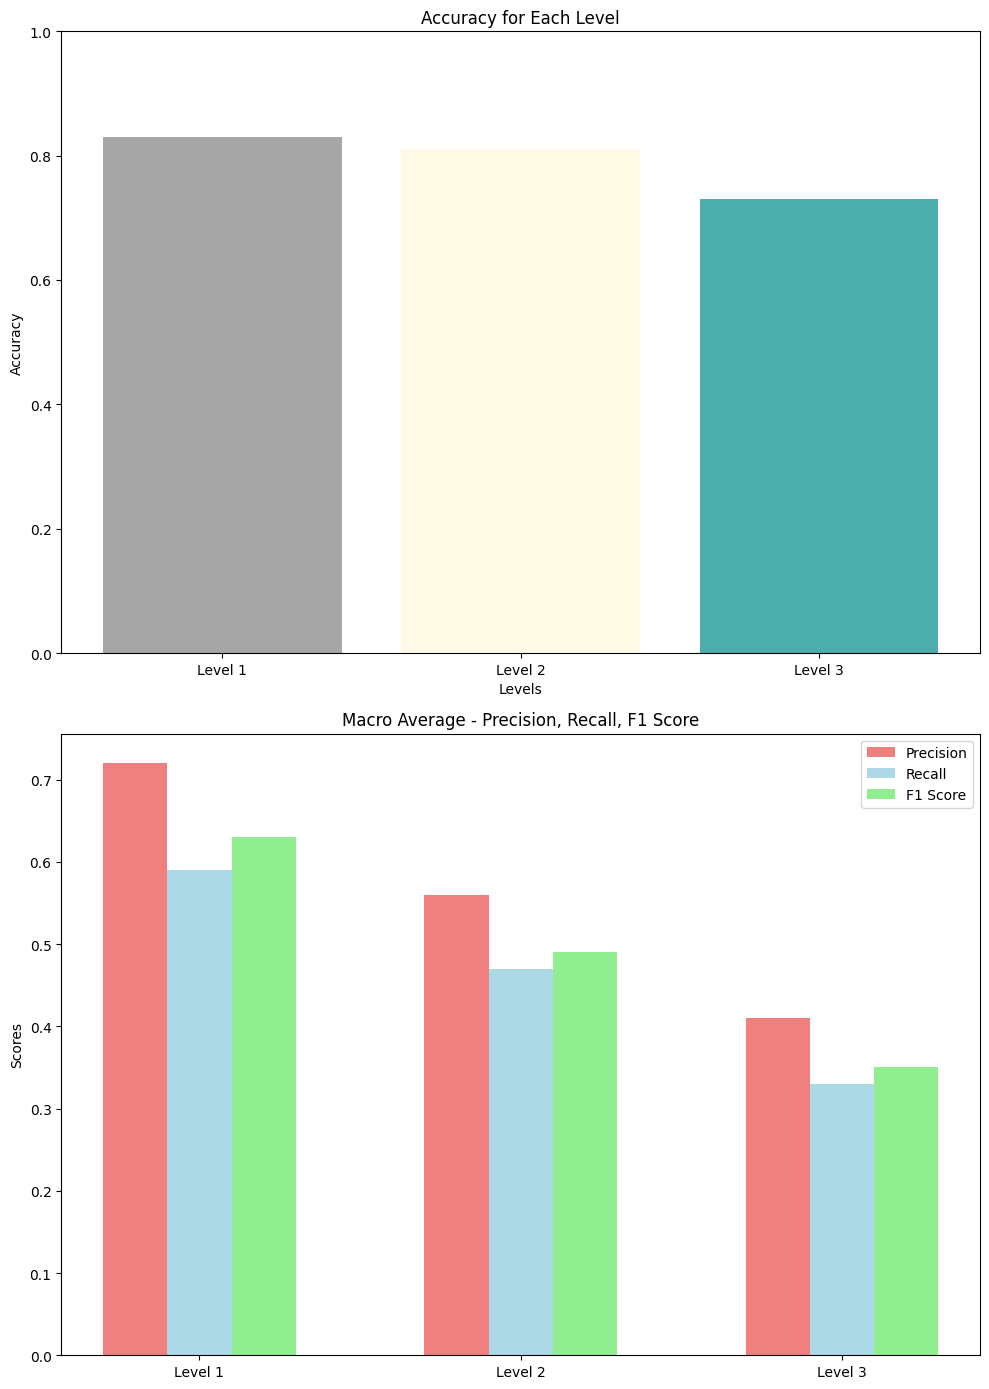

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 14))

axes[0].bar(levels, accuracy, color=colors, alpha=0.7)
axes[0].set_title('Accuracy for Each Level')
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Levels')

width = 0.2
x = np.arange(len(levels))

axes[1].bar(x - width, macro_avg_precision, width, label='Precision', color='lightcoral')
axes[1].bar(x, macro_avg_recall, width, label='Recall', color='lightblue')
axes[1].bar(x + width, macro_avg_f1, width, label='F1 Score', color='lightgreen')

axes[1].set_title('Macro Average - Precision, Recall, F1 Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(levels)
axes[1].set_ylabel('Scores')
axes[1].legend()


plt.tight_layout()
plt.show()


K-Nearest Neighbours(KNN)

In [ ]:
X = df.drop(columns=['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category'])
y = df[['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df['s:name'] = df['s:name'].fillna('')
df['s:description'] = df['s:description'].fillna('')
df['s:breadcrumb'] = df['s:breadcrumb'].fillna('')
df['s:brand'] = df['s:brand'].fillna('Unknown')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(max_features=1000), 's:name'),
        ('description_tfidf', TfidfVectorizer(max_features=5000), 's:description'),
        ('breadcrumb_tfidf', TfidfVectorizer(max_features=500), 's:breadcrumb'),
        ('brand_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['s:brand']),
        ('scaler', StandardScaler(), ['description_length'])
    ],
    remainder='drop'
)

In [ ]:
model = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5))

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('name_tfidf',
                                                  TfidfVectorizer(max_features=1000),
                                                  's:name'),
                                                 ('description_tfidf',
                                                  TfidfVectorizer(max_features=5000),
                                                  's:description'),
                                                 ('breadcrumb_tfidf',
                                                  TfidfVectorizer(max_features=500),
                                                  's:breadcrumb'),
                                                 ('brand_ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['s:brand']),
                                                 ('scaler', StandardScaler(),
                                                  ['description_length'])])),
                ('classifier',
                 MultiOutputClassifier(estimator=KNeighborsClassifier()))])

In [ ]:
knn_pred = pipeline.predict(X_test) # Assign the prediction to knn_pred

In [ ]:
print("--- Classification Report for Level 1 ---")
print(classification_report(y_test['GS1_Level1_Category'], knn_pred[:, 0],zero_division=0))


--- Classification Report for Level 1 ---
                                                        precision    recall  f1-score   support

                                10000000_Pet Care/Food       0.62      0.71      0.67        42
                    47000000_Cleaning/Hygiene Products       0.53      0.67      0.59        12
                        50000000_Food/Beverage/Tobacco       0.75      0.55      0.63        33
                                   51000000_Healthcare       0.77      0.38      0.51        45
                 53000000_Beauty/Personal Care/Hygiene       0.67      0.45      0.54        22
                                    54000000_Baby Care       0.50      0.33      0.40         6
          60000000_Textual/Printed/Reference Materials       0.27      0.46      0.34        24
                                        61000000_Music       0.42      0.62      0.50         8
62000000_Stationery/Office Machinery/Occasion Supplies       0.71      0.53      0.61        

In [ ]:
print("--- Classification Report for Level 2 ---")
print(classification_report(y_test['GS1_Level2_Category'], knn_pred[:, 1], zero_division=0))


--- Classification Report for Level 2 ---
                                                                 precision    recall  f1-score   support

                                              10100000_Pet Care       0.52      0.66      0.58        35
                                       10110000_Pet Food/Drinks       1.00      0.57      0.73         7
                                     47100000_Cleaning Products       0.42      0.56      0.48         9
                          47120000_Insect/Pest/Allergen Control       1.00      1.00      1.00         3
       50100000_Fruits/Vegetables/Nuts/Seeds Prepared/Processed       0.00      0.00      0.00         3
     50130000_Milk/Butter/Cream/Yogurts/Cheese/Eggs/Substitutes       0.00      0.00      0.00         1
               50160000_Confectionery/Sugar Sweetening Products       1.00      0.33      0.50         3
                     50170000_Seasonings/Preservatives/Extracts       0.00      0.00      0.00         1
            

In [ ]:
print("--- Classification Report for Level 3 ---")
print(classification_report(y_test['GS1_Level3_Category'], knn_pred[:, 2], zero_division=0))

--- Classification Report for Level 3 ---
                                                                      precision    recall  f1-score   support

                                        10101500_Pet Welfare/Hygiene       0.33      0.12      0.18         8
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.51      0.77      0.62        26
                                                   10111600_Pet Food       1.00      0.57      0.73         7
                                                   47101600_Cleaners       0.56      0.56      0.56         9
                                                    47101700_Laundry       0.00      0.00      0.00         0
                                               47101900_Surface Care       0.00      0.00      0.00         0
                               47121500_Insect/Pest/Allergen Control       1.

In [ ]:
levels = ['Level 1', 'Level 2', 'Level 3']
accuracy = [0.70, 0.69, 0.59]
macro_avg_precision = [0.63, 0.51, 0.32]
macro_avg_recall = [0.43, 0.34, 0.24]
macro_avg_f1 = [0.44, 0.36, 0.25]
weighted_avg_precision = [0.73, 0.71, 0.65]
weighted_avg_recall = [0.70, 0.69, 0.59]
weighted_avg_f1 = [0.68, 0.66, 0.58]

colors = ['chocolate', 'bisque', 'aquamarine']

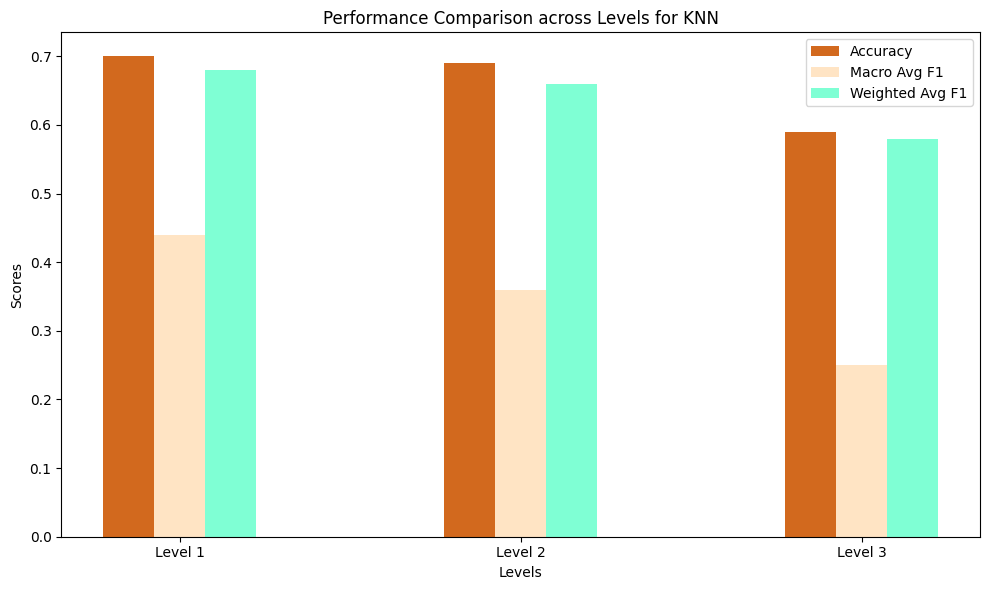

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
index = np.arange(len(levels))
bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy', color=colors[0])
bar2 = ax.bar(index + bar_width, macro_avg_f1, bar_width, label='Macro Avg F1', color=colors[1])
bar3 = ax.bar(index + 2 * bar_width, weighted_avg_f1, bar_width, label='Weighted Avg F1', color=colors[2])

ax.set_xlabel('Levels')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison across Levels for KNN')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(levels)
ax.legend()

plt.tight_layout()
plt.show()

Decision Tree:

In [ ]:
X = df.drop(columns=['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category'])
y = df[['GS1_Level1_Category', 'GS1_Level2_Category', 'GS1_Level3_Category']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df['s:name'] = df['s:name'].fillna('')
df['s:description'] = df['s:description'].fillna('')
df['s:breadcrumb'] = df['s:breadcrumb'].fillna('')
df['s:brand'] = df['s:brand'].fillna('Unknown')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('name_tfidf', TfidfVectorizer(max_features=1000), 's:name'),
        ('description_tfidf', TfidfVectorizer(max_features=5000), 's:description'),
        ('breadcrumb_tfidf', TfidfVectorizer(max_features=500), 's:breadcrumb'),
        ('brand_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['s:brand']),
        ('scaler', StandardScaler(), ['description_length'])
    ],
    remainder='drop'
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(DecisionTreeClassifier(random_state=42)))
])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('name_tfidf',
                                                  TfidfVectorizer(max_features=1000),
                                                  's:name'),
                                                 ('description_tfidf',
                                                  TfidfVectorizer(max_features=5000),
                                                  's:description'),
                                                 ('breadcrumb_tfidf',
                                                  TfidfVectorizer(max_features=500),
                                                  's:breadcrumb'),
                                                 ('brand_ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['s:brand']),
                                                 ('scaler', StandardScaler(),
                                                  ['description_length'])])),
                ('classifier',
                 MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42)))])

In [ ]:
decy_pred = pipeline.predict(X_test)

In [ ]:
print("--- Classification Report for Level 1 ---")
print(classification_report(y_test['GS1_Level1_Category'], decy_pred[:, 0], zero_division=0))

--- Classification Report for Level 1 ---
                                                        precision    recall  f1-score   support

                                10000000_Pet Care/Food       0.48      0.50      0.49        42
                    47000000_Cleaning/Hygiene Products       0.39      0.58      0.47        12
                        50000000_Food/Beverage/Tobacco       0.60      0.64      0.62        33
                                   51000000_Healthcare       0.75      0.67      0.71        45
                 53000000_Beauty/Personal Care/Hygiene       0.45      0.45      0.45        22
                                    54000000_Baby Care       0.50      0.33      0.40         6
          60000000_Textual/Printed/Reference Materials       0.57      0.54      0.55        24
                                        61000000_Music       0.38      0.38      0.38         8
62000000_Stationery/Office Machinery/Occasion Supplies       0.50      0.37      0.42        

In [ ]:
print("--- Classification Report for Level 2 ---")
print(classification_report(y_test['GS1_Level2_Category'], decy_pred[:, 1], zero_division=0))

--- Classification Report for Level 2 ---
                                                                 precision    recall  f1-score   support

                                              10100000_Pet Care       0.50      0.51      0.51        35
                                       10110000_Pet Food/Drinks       0.50      0.43      0.46         7
                                     47100000_Cleaning Products       0.71      0.56      0.62         9
                          47120000_Insect/Pest/Allergen Control       0.67      0.67      0.67         3
                             47210000_Waste Management Products       0.00      0.00      0.00         0
       50100000_Fruits/Vegetables/Nuts/Seeds Prepared/Processed       0.50      0.67      0.57         3
     50130000_Milk/Butter/Cream/Yogurts/Cheese/Eggs/Substitutes       0.00      0.00      0.00         1
               50160000_Confectionery/Sugar Sweetening Products       0.40      0.67      0.50         3
            

In [ ]:
print("--- Classification Report for Level 3 ---")
print(classification_report(y_test['GS1_Level3_Category'], decy_pred[:, 2], zero_division=0))


--- Classification Report for Level 3 ---
                                                                      precision    recall  f1-score   support

                                        10101500_Pet Welfare/Hygiene       1.00      0.50      0.67         8
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.59      0.50      0.54        26
                                                   10111600_Pet Food       0.62      0.71      0.67         7
                                                   47101600_Cleaners       0.67      0.44      0.53         9
                                                    47101700_Laundry       0.00      0.00      0.00         0
                               47121500_Insect/Pest/Allergen Control       1.00      1.00      1.00         3
                                     47210100_Waste Storage Products       0.

In [ ]:
levels = ['Level 1', 'Level 2', 'Level 3']
accuracy = [0.74, 0.73, 0.70]
macro_avg_precision = [0.52, 0.42, 0.34]
macro_avg_recall = [0.50, 0.42, 0.32]
macro_avg_f1 = [0.50, 0.40, 0.31]

In [ ]:
colors = ['beige', 'cadetblue', 'coral']

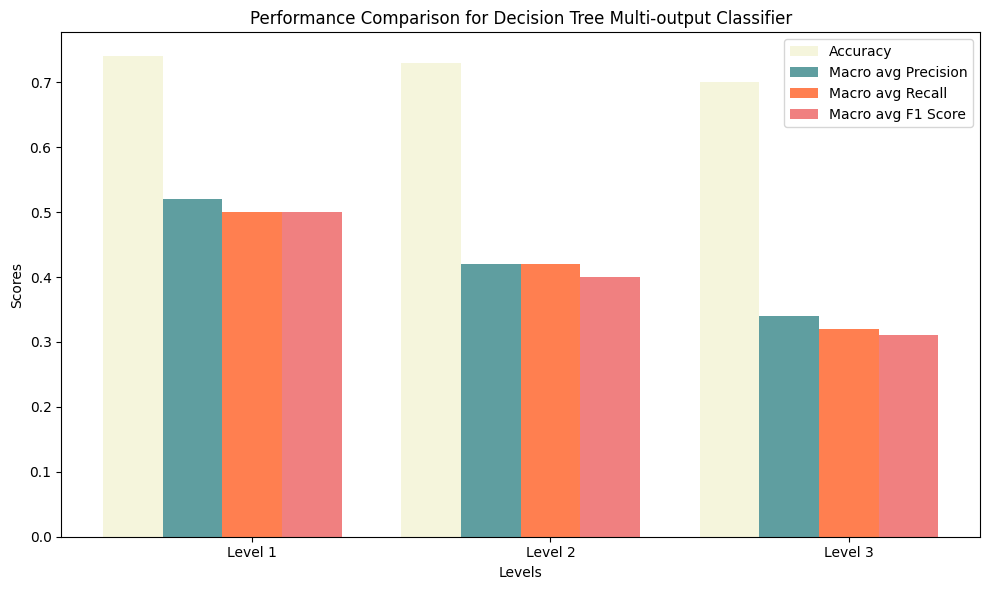

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2  # Bar width
index = np.arange(len(levels))
bar1 = ax.bar(index - bar_width, accuracy, bar_width, label='Accuracy', color=colors[0])
bar2 = ax.bar(index, macro_avg_precision, bar_width, label='Macro avg Precision', color=colors[1])
bar3 = ax.bar(index + bar_width, macro_avg_recall, bar_width, label='Macro avg Recall', color=colors[2])
bar4 = ax.bar(index + 2*bar_width, macro_avg_f1, bar_width, label='Macro avg F1 Score', color='lightcoral')
ax.set_xlabel('Levels')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison for Decision Tree Multi-output Classifier')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(levels)
ax.legend()

plt.tight_layout()
plt.show()

Comparison of Reports of Different Models:

In [ ]:
levels = ['Level 1', 'Level 2', 'Level 3']

# Random Forest Results
rf_accuracy = [0.78, 0.77, 0.73]
rf_macro_f1 = [0.60, 0.50, 0.36]
rf_weighted_f1 = [0.77, 0.75, 0.70]

# Extra Trees Results
et_accuracy = [0.80, 0.78, 0.74]
et_macro_f1 = [0.60, 0.50, 0.38]
et_weighted_f1 = [0.78, 0.77, 0.70]

# Logistic Regression Results
logreg_accuracy = [0.82, 0.80, 0.73]
logreg_macro_f1 = [0.63, 0.47, 0.34]
logreg_weighted_f1 = [0.81, 0.77, 0.68]

# Naive Bayes Results
nb_accuracy = [0.83, 0.81, 0.73]
nb_macro_f1 = [0.63, 0.49, 0.35]
nb_weighted_f1 = [0.63, 0.49, 0.35]

# KNN Results
knn_accuracy = [0.70, 0.69, 0.59]
knn_macro_f1 = [0.44, 0.36, 0.25]
knn_weighted_f1 = [0.68, 0.66, 0.58]

# Decision Tree Results
dt_accuracy = [0.74, 0.73, 0.70]
dt_macro_f1 = [0.50, 0.40, 0.31]
dt_weighted_f1 = [0.50, 0.40, 0.31]

# List of models
models = ['Random Forest', 'Extra Trees', 'Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree']

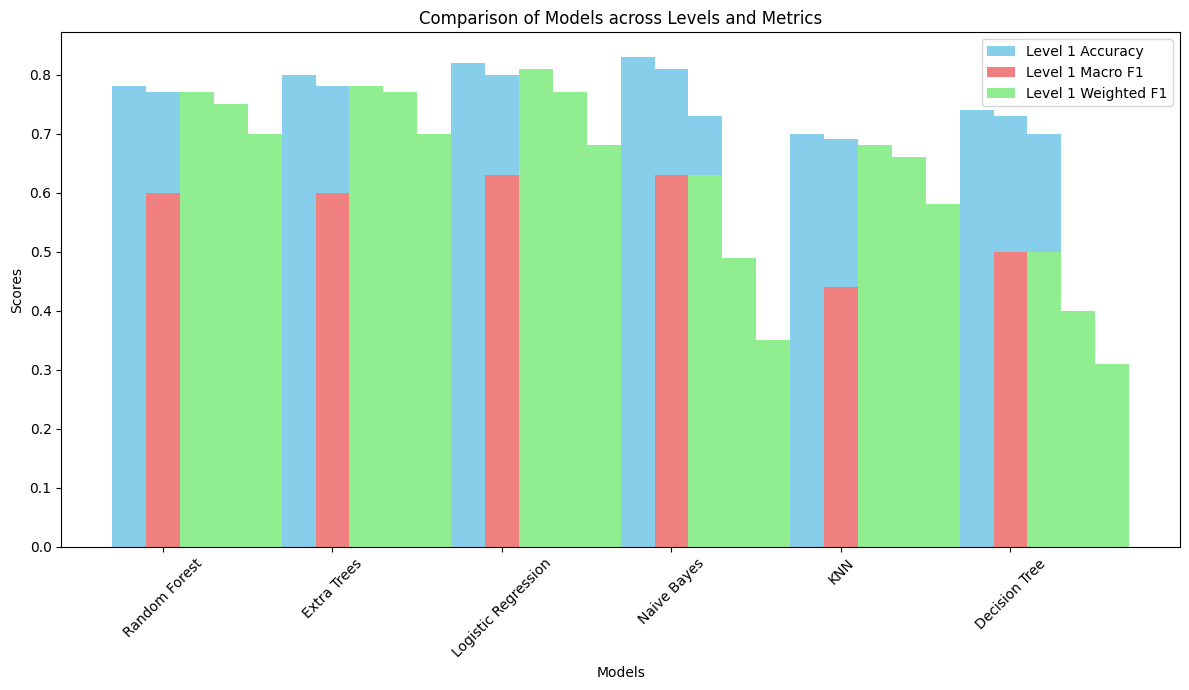

In [ ]:
n_models = len(models)
n_levels = len(levels)
width = 0.2
x = np.arange(n_models)
fig, ax = plt.subplots(figsize=(12, 7))
for i, (metric, color) in enumerate([("Accuracy", 'skyblue'), ("Macro F1", 'lightcoral'), ("Weighted F1", 'lightgreen')]):
    data = [rf_accuracy, et_accuracy, logreg_accuracy, nb_accuracy, knn_accuracy, dt_accuracy] if metric == "Accuracy" else \
           [rf_macro_f1, et_macro_f1, logreg_macro_f1, nb_macro_f1, knn_macro_f1, dt_macro_f1] if metric == "Macro F1" else \
           [rf_weighted_f1, et_weighted_f1, logreg_weighted_f1, nb_weighted_f1, knn_weighted_f1, dt_weighted_f1]

    # Loop through each level to plot bars for each level
    for j in range(n_levels):
        # Shift the bars based on the metric index and level index
        ax.bar(x + (i - 1) * width + j * width,
               [model[j] for model in data],
               width,
               label=f'{levels[j]} {metric}' if j == 0 else "",  # Label only once
               color=color)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models across Levels and Metrics')
plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

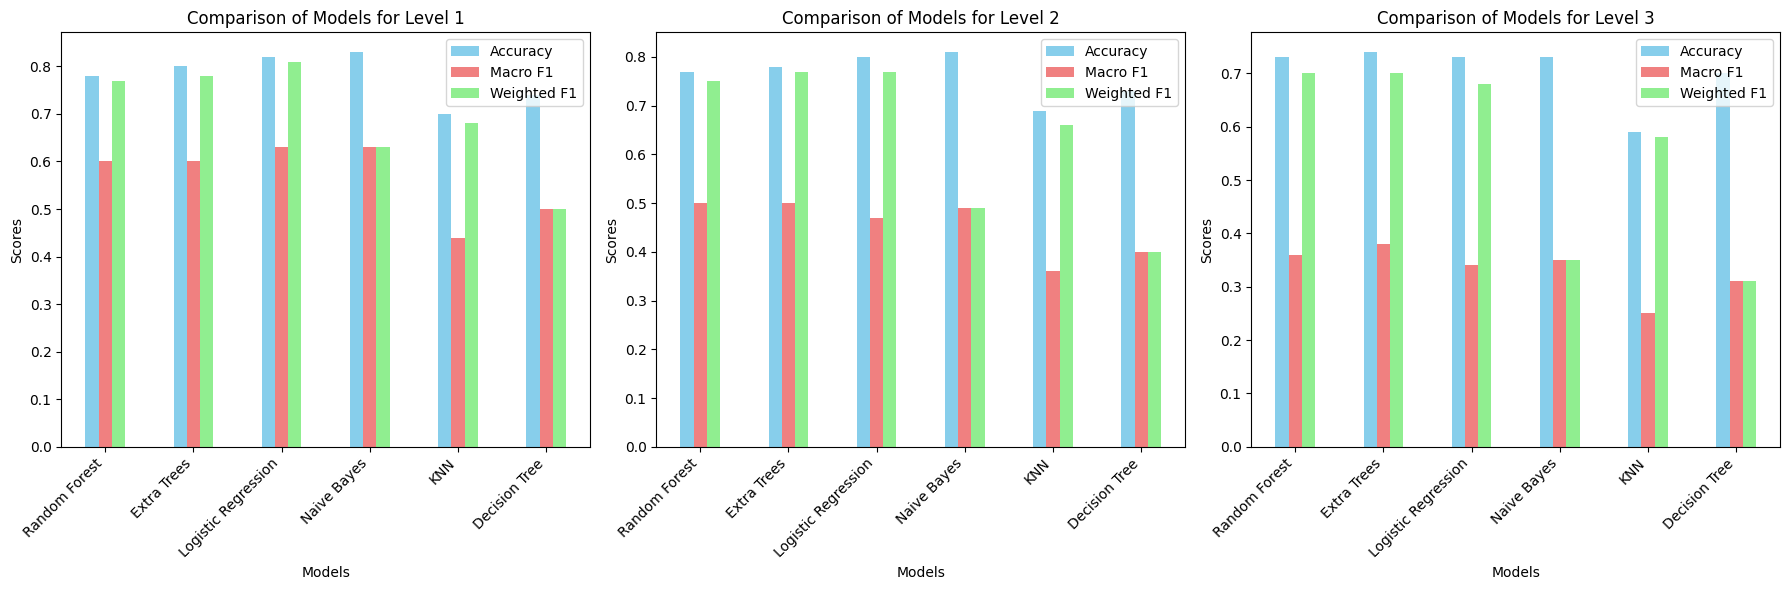

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given data for all models
models = ['Random Forest', 'Extra Trees', 'Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree']

# Random Forest Results
rf_accuracy = [0.78, 0.77, 0.73]
rf_macro_f1 = [0.60, 0.50, 0.36]
rf_weighted_f1 = [0.77, 0.75, 0.70]

# Extra Trees Results
et_accuracy = [0.80, 0.78, 0.74]
et_macro_f1 = [0.60, 0.50, 0.38]
et_weighted_f1 = [0.78, 0.77, 0.70]

# Logistic Regression Results
logreg_accuracy = [0.82, 0.80, 0.73]
logreg_macro_f1 = [0.63, 0.47, 0.34]
logreg_weighted_f1 = [0.81, 0.77, 0.68]

# Naive Bayes Results
nb_accuracy = [0.83, 0.81, 0.73]
nb_macro_f1 = [0.63, 0.49, 0.35]
nb_weighted_f1 = [0.63, 0.49, 0.35]

# KNN Results
knn_accuracy = [0.70, 0.69, 0.59]
knn_macro_f1 = [0.44, 0.36, 0.25]
knn_weighted_f1 = [0.68, 0.66, 0.58]

# Decision Tree Results
dt_accuracy = [0.74, 0.73, 0.70]
dt_macro_f1 = [0.50, 0.40, 0.31]
dt_weighted_f1 = [0.50, 0.40, 0.31]

# Grouping by Levels for each metric
levels = ['Level 1', 'Level 2', 'Level 3']

# Data for each level
level_data = {
    'Level 1': [rf_accuracy[0], et_accuracy[0], logreg_accuracy[0], nb_accuracy[0], knn_accuracy[0], dt_accuracy[0]],
    'Level 2': [rf_accuracy[1], et_accuracy[1], logreg_accuracy[1], nb_accuracy[1], knn_accuracy[1], dt_accuracy[1]],
    'Level 3': [rf_accuracy[2], et_accuracy[2], logreg_accuracy[2], nb_accuracy[2], knn_accuracy[2], dt_accuracy[2]],
}

level_metrics = {
    'Level 1': [rf_macro_f1[0], et_macro_f1[0], logreg_macro_f1[0], nb_macro_f1[0], knn_macro_f1[0], dt_macro_f1[0]],
    'Level 2': [rf_macro_f1[1], et_macro_f1[1], logreg_macro_f1[1], nb_macro_f1[1], knn_macro_f1[1], dt_macro_f1[1]],
    'Level 3': [rf_macro_f1[2], et_macro_f1[2], logreg_macro_f1[2], nb_macro_f1[2], knn_macro_f1[2], dt_macro_f1[2]],
}

level_weighted_f1 = {
    'Level 1': [rf_weighted_f1[0], et_weighted_f1[0], logreg_weighted_f1[0], nb_weighted_f1[0], knn_weighted_f1[0], dt_weighted_f1[0]],
    'Level 2': [rf_weighted_f1[1], et_weighted_f1[1], logreg_weighted_f1[1], nb_weighted_f1[1], knn_weighted_f1[1], dt_weighted_f1[1]],
    'Level 3': [rf_weighted_f1[2], et_weighted_f1[2], logreg_weighted_f1[2], nb_weighted_f1[2], knn_weighted_f1[2], dt_weighted_f1[2]],
}

# Create separate plots for each level
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Colors for the plots
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Loop through each level and plot the comparisons
for i, (level, data) in enumerate(level_data.items()):
    ax = axes[i]
    bar_width = 0.15  # width of each bar
    x = np.arange(len(models))  # position of bars

    # Accuracy bars
    ax.bar(x - bar_width, level_data[level], bar_width, label='Accuracy', color=colors[0])
    # Macro F1 bars
    ax.bar(x, level_metrics[level], bar_width, label='Macro F1', color=colors[1])
    # Weighted F1 bars
    ax.bar(x + bar_width, level_weighted_f1[level], bar_width, label='Weighted F1', color=colors[2])

    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right")  # Rotate x labels and align them properly
    ax.set_title(f'Comparison of Models for {level}')
    ax.set_ylabel('Scores')
    ax.set_xlabel('Models')
    ax.legend()

plt.tight_layout()
plt.show()


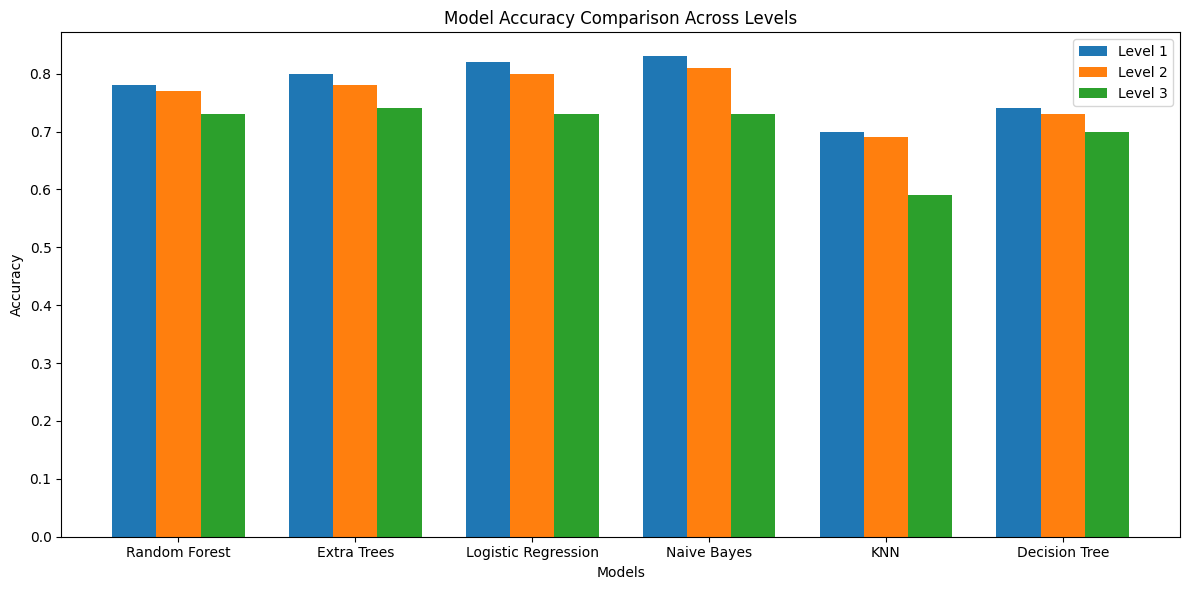

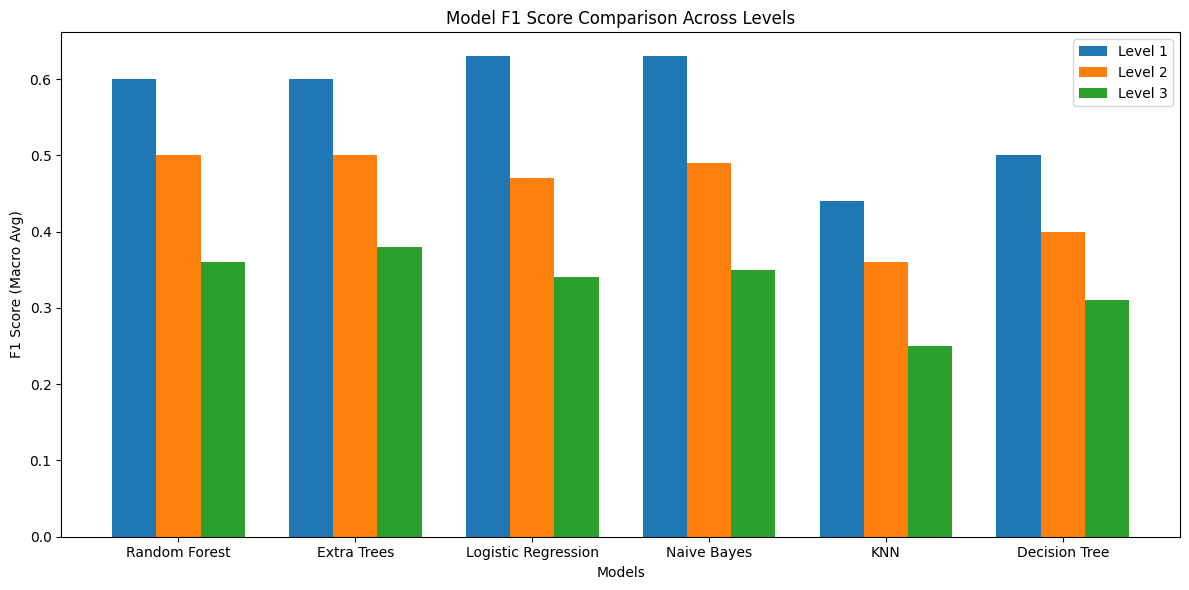

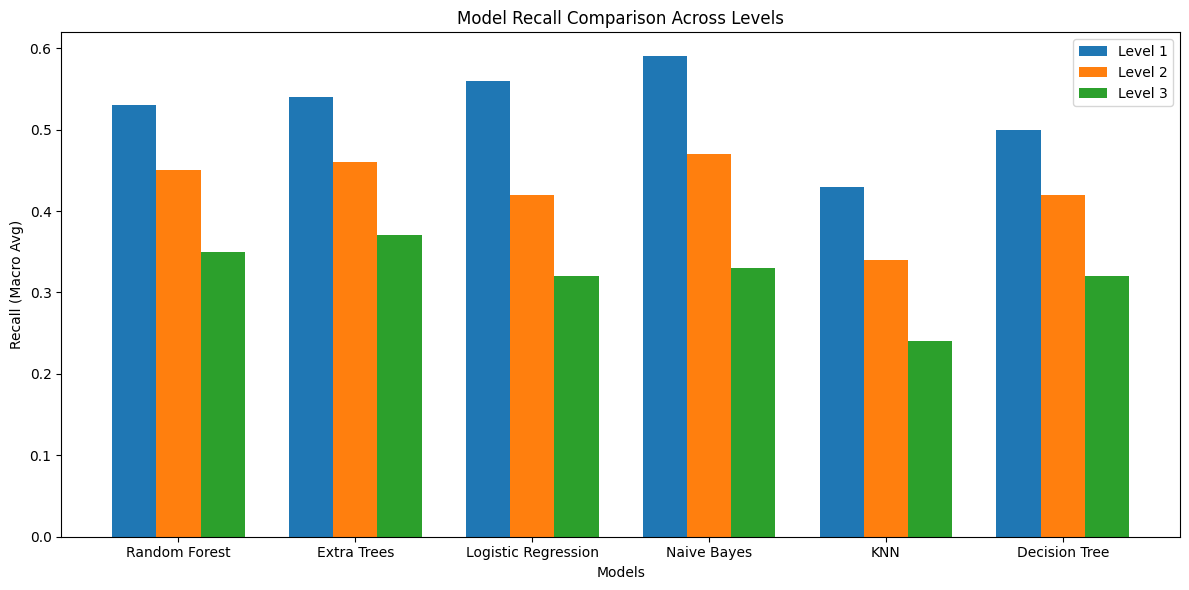

(None, None, None)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models and their metrics
models = ["Random Forest", "Extra Trees", "Logistic Regression", "Naive Bayes", "KNN", "Decision Tree"]
levels = ["Level 1", "Level 2", "Level 3"]

# Accuracy, F1, Recall (Macro Avg), and Weighted Avg metrics
accuracy = [
    [0.78, 0.77, 0.73],  # Random Forest
    [0.80, 0.78, 0.74],  # Extra Trees
    [0.82, 0.80, 0.73],  # Logistic Regression
    [0.83, 0.81, 0.73],  # Naive Bayes
    [0.70, 0.69, 0.59],  # KNN
    [0.74, 0.73, 0.70],  # Decision Tree
]

macro_f1 = [
    [0.60, 0.50, 0.36],  # Random Forest
    [0.60, 0.50, 0.38],  # Extra Trees
    [0.63, 0.47, 0.34],  # Logistic Regression
    [0.63, 0.49, 0.35],  # Naive Bayes
    [0.44, 0.36, 0.25],  # KNN
    [0.50, 0.40, 0.31],  # Decision Tree
]

recall = [
    [0.53, 0.45, 0.35],  # Random Forest
    [0.54, 0.46, 0.37],  # Extra Trees
    [0.56, 0.42, 0.32],  # Logistic Regression
    [0.59, 0.47, 0.33],  # Naive Bayes
    [0.43, 0.34, 0.24],  # KNN
    [0.50, 0.42, 0.32],  # Decision Tree
]

# Function to plot comparisons
def plot_comparison(data, title, ylabel, filename):
    x = np.arange(len(models))
    width = 0.25

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width, [row[0] for row in data], width, label=levels[0])
    rects2 = ax.bar(x, [row[1] for row in data], width, label=levels[1])
    rects3 = ax.bar(x + width, [row[2] for row in data], width, label=levels[2])

    ax.set_xlabel("Models")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()

    plt.tight_layout()

    plt.show()


# Generate the plots
accuracy_plot = plot_comparison(accuracy, "Model Accuracy Comparison Across Levels", "Accuracy", "accuracy_comparison")
f1_plot = plot_comparison(macro_f1, "Model F1 Score Comparison Across Levels", "F1 Score (Macro Avg)", "f1_comparison")
recall_plot = plot_comparison(recall, "Model Recall Comparison Across Levels", "Recall (Macro Avg)", "recall_comparison")

accuracy_plot, f1_plot, recall_plot


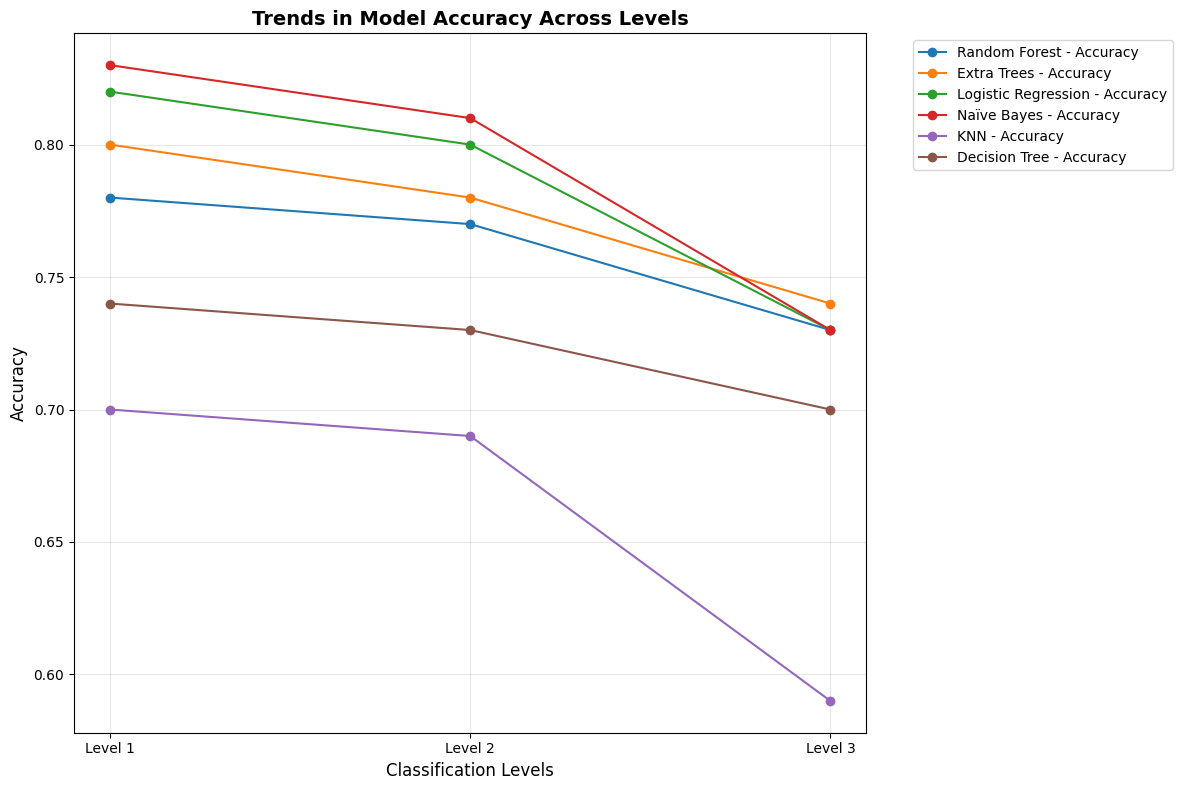

In [ ]:
# Trends in model performance across metrics for all levels
import matplotlib.pyplot as plt

# Levels
levels = ['Level 1', 'Level 2', 'Level 3']

# Accuracy scores
rf_acc = [0.78, 0.77, 0.73]
et_acc = [0.80, 0.78, 0.74]
logreg_acc = [0.82, 0.80, 0.73]
nb_acc = [0.83, 0.81, 0.73]
knn_acc = [0.70, 0.69, 0.59]
dt_acc = [0.74, 0.73, 0.70]

# Macro F1 scores
rf_macro = [0.60, 0.50, 0.36]
et_macro = [0.60, 0.50, 0.38]
logreg_macro = [0.63, 0.47, 0.34]
nb_macro = [0.63, 0.49, 0.35]
knn_macro = [0.44, 0.36, 0.25]
dt_macro = [0.50, 0.40, 0.31]

# Weighted F1 scores
rf_weighted = [0.77, 0.75, 0.70]
et_weighted = [0.78, 0.77, 0.70]
logreg_weighted = [0.81, 0.77, 0.68]
nb_weighted = [0.63, 0.49, 0.35]
knn_weighted = [0.68, 0.66, 0.58]
dt_weighted = [0.50, 0.40, 0.31]

# Plot trends for each model
plt.figure(figsize=(12, 8))

# Accuracy
plt.plot(levels, rf_acc, label="Random Forest - Accuracy", linestyle='-', marker='o')
plt.plot(levels, et_acc, label="Extra Trees - Accuracy", linestyle='-', marker='o')
plt.plot(levels, logreg_acc, label="Logistic Regression - Accuracy", linestyle='-', marker='o')
plt.plot(levels, nb_acc, label="Naïve Bayes - Accuracy", linestyle='-', marker='o')
plt.plot(levels, knn_acc, label="KNN - Accuracy", linestyle='-', marker='o')
plt.plot(levels, dt_acc, label="Decision Tree - Accuracy", linestyle='-', marker='o')

# Add chart details
plt.title("Trends in Model Accuracy Across Levels", fontsize=14, fontweight='bold')
plt.xlabel("Classification Levels", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
